### Importing Important Libraries

In [11]:
# pip install openpyxl


In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Add the scripts folder to the system path so we can import time_series.py
import sys
import os
from scipy.stats import zscore
# for a folder that contain scripts for modularity 
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src')) 
from preprocessing import NoiseHandling
from data_loader import FileLoader
from path import FilePathManager
from connection import Db_Connection
from eda import EDA
from user_overview_analysis import UserOverviewAnalysis
from user_engagement_analysis import user_engagement_analysis
from user_satisfaction_analysis import UserSatisfactionAnalysis
from plot import Plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Create an instance of the class
file_manager = FilePathManager()

# Retrieve the file paths
file_paths = file_manager.get_file_paths()
file_name = file_manager.get_file_name()

# Initialize the loader with the file paths
loader = FileLoader(file_paths)

# Load all files
loader.load_files()

# Access individual DataFrames by file name
df = loader.get_dataframe(file_name[0])
df_desc = loader.get_dataframe(file_name[1])

In [25]:
df_desc

Fields  \
0                                  bearer id   
1                                  Dur. (ms)   
2                                      Start   
3                                   Start ms   
4                                        End   
5                                     End ms   
6                                   Dur. (s)   
7                                       IMSI   
8                              MSISDN/Number   
9                                       IMEI   
10                        Last Location Name   
11                           Avg RTT DL (ms)   
12                           Avg RTT UL (ms)   
13                   Avg Bearer TP DL (kbps)   
14                   Avg Bearer TP UL (kbps)   
15               TCP DL Retrans. Vol (Bytes)   
16               TCP UL Retrans. Vol (Bytes)   
17                       DL TP < 50 Kbps (%)   
18            50 Kbps < DL TP < 250 Kbps (%)   
19             250 Kbps < DL TP < 1 Mbps (%)   
20                        DL TP > 1 Mbps (%)   
21                       UL TP < 10 Kbps (%)   
22             10 Kbps < UL TP < 50 Kbps (%)   
23            50 Kbps < UL TP < 300 Kbps (%)   
24                      UL TP > 300 Kbps (%)   
25                           HTTP DL (Bytes)   
26                           HTTP UL (Bytes)   
27                 Activity Duration DL (ms)   
28                 Activity Duration UL (ms)   
29                               Dur. (ms).1   
30                      Handset Manufacturer   
31                              Handset Type   
32           Nb of sec with 125000B < Vol DL   
33     Nb of sec with 1250B < Vol UL < 6250B   
34  Nb of sec with 31250B < Vol DL < 125000B   
35            Nb of sec with 37500B < Vol UL   
36    Nb of sec with 6250B < Vol DL < 31250B   
37    Nb of sec with 6250B < Vol UL < 37500B   
38             Nb of sec with Vol DL < 6250B   
39             Nb of sec with Vol UL < 1250B   
40                   Social Media DL (Bytes)   
41                   Social Media UL (Bytes)   
42                        YouTube DL (Bytes)   
43                        YouTube UL (Bytes)   
44                        Netflix DL (Bytes)   
45                        Netflix UL (Bytes)   
46                         Google DL (Bytes)   
47                         Google UL (Bytes)   
48                          Email DL (Bytes)   
49                          Email UL (Bytes)   
50                         Gaming DL (Bytes)   
51                         Gaming UL (Bytes)   
52                                  Other DL   
53                                  Other UL   
54                          Total DL (Bytes)   
55                          Total UL (Bytes)   

                                          Description  
0                              xDr session identifier  
1                   Total Duration of the xDR (in ms)  
2       Start time of the xDR (first frame timestamp)  
3   Milliseconds offset of start time for the xDR ...  
4          End time of the xDR (last frame timestamp)  
5   Milliseconds offset of end time of the xDR (la...  
6                    Total Duration of the xDR (in s)  
7            International Mobile Subscriber Identity  
8   MS International PSTN/ISDN Number of mobile - ...  
9             International Mobile Equipment Identity  
10  User location call name (2G/3G/4G) at the end ...  
11  Average Round Trip Time measurement Downlink d...  
12  Average Round Trip Time measurement Uplink dir...  
13  Average Bearer Throughput for Downlink (kbps) ...  
14  Average Bearer Throughput for uplink (kbps) - ...  
15  TCP volume of Downlink packets detected as ret...  
16  TCP volume of Uplink packets detected as retra...  
17  Duration ratio when Bearer Downlink Throughput...  
18  Duration ratio when Bearer Downlink Throughput...  
19  Duration ratio when Bearer Downlink Throughput...  
20  Duration ratio when Bearer Downlink Throughput...  
21  Duration ratio when Bearer Uplink Throughput < ….  
22  Duration 

### Explanatory Data Analysis

In [9]:
# Create an instance of the EDA class
eda = EDA(df)

# Display the top 5 rows
top_n = eda.display_top_n(5)
top_n

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [32]:
eda.display_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [16]:
eda.display_description()

count          mean  \
Bearer Id                                 149010.0  1.013887e+19   
Start ms                                  150000.0  4.991882e+02   
End ms                                    150000.0  4.988009e+02   
Dur. (ms)                                 150000.0  1.046086e+05   
IMSI                                      149431.0  2.082016e+14   
MSISDN/Number                             148935.0  4.188282e+10   
IMEI                                      149429.0  4.847455e+13   
Avg RTT DL (ms)                           122172.0  1.097957e+02   
Avg RTT UL (ms)                           122189.0  1.766288e+01   
Avg Bearer TP DL (kbps)                   150000.0  1.330005e+04   
Avg Bearer TP UL (kbps)                   150000.0  1.770429e+03   
TCP DL Retrans. Vol (Bytes)                61855.0  2.080991e+07   
TCP UL Retrans. Vol (Bytes)                53352.0  7.596587e+05   
DL TP < 50 Kbps (%)                       149247.0  9.284475e+01   
50 Kbps < DL TP < 250 Kbps (%)            149247.0  3.069355e+00   
250 Kbps < DL TP < 1 Mbps (%)             149247.0  1.717341e+00   
DL TP > 1 Mbps (%)                        149247.0  1.609654e+00   
UL TP < 10 Kbps (%)                       149209.0  9.853014e+01   
10 Kbps < UL TP < 50 Kbps (%)             149209.0  7.767494e-01   
50 Kbps < UL TP < 300 Kbps (%)            149209.0  1.479871e-01   
UL TP > 300 Kbps (%)                      149209.0  7.892285e-02   
HTTP DL (Bytes)                            68527.0  1.144710e+08   
HTTP UL (Bytes)                            68191.0  3.242301e+06   
Activity Duration DL (ms)                 150000.0  1.829177e+06   
Activity Duration UL (ms)                 150000.0  1.408880e+06   
Dur. (ms).1                               150000.0  1.046091e+08   
Nb of sec with 125000B < Vol DL            52463.0  9.897000e+02   
Nb of sec with 1250B < Vol UL < 6250B      57107.0  3.404344e+02   
Nb of sec with 31250B < Vol DL < 125000B   56415.0  8.108374e+02   
Nb of sec with 37500B < Vol UL             19747.0  1.492571e+02   
Nb of sec with 6250B < Vol DL < 31250B     61684.0  9.654648e+02   
Nb of sec with 6250B < Vol UL < 37500B     38158.0  1.413048e+02   
Nb of sec with Vol DL < 6250B             149246.0  3.719788e+03   
Nb of sec with Vol UL < 1250B             149208.0  4.022083e+03   
Social Media DL (Bytes)                   150001.0  1.795322e+06   
Social Media UL (Bytes)                   150001.0  3.292843e+04   
Google DL (Bytes)                         150001.0  5.750753e+06   
Google UL (Bytes)                         150001.0  2.056542e+06   
Email DL (Bytes)                          150001.0  1.791729e+06   
Email UL (Bytes)                          150001.0  4.673734e+05   
Youtube DL (Bytes)                        150001.0  1.163407e+07   
Youtube UL (Bytes)                        150001.0  1.100941e+07   
Netflix DL (Bytes)                        150001.0  1.162685e+07   
Netflix UL (Bytes)                        150001.0  1.100175e+07   
Gaming DL (Bytes)                         150001.0  4.220447e+08   
Gaming UL (Bytes)                         150001.0  8.288398e+06   
Other DL (Bytes)                          150001.0  4.211005e+08   
Other UL (Bytes)                          150001.0  8.264799e+06   
Total UL (Bytes)                          150000.0  4.112121e+07   
Total DL (Bytes)                          150000.0  4.546434e+08   

                                                   std           min  \
Bearer Id                                 2.893173e+18  6.917538e+18   
Start ms                                  2.886118e+02  0.000000e+00   
End ms                                    2.880977e+02  0.000000e+00   
Dur. (ms)                                 8.103762e+04  7.142000e+03   
IMSI                                      2.148809e+10  2.040471e+14   
MSISDN/Number                             2.447443e+12  3.360100e+10   
IMEI                                      2.241637e+13  4.400152e+11   


### Identify and Handle Missing values 

In [17]:
eda.check_null_values()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### Here is the code that checks columns that have very small missing values 

In [11]:
# Use the first method with custom min and max values
columns_with_few_nulls, rows_with_missing_values = NoiseHandling.check_missed_greater_than_3(df, min_value=0, max_value=2)
print("Columns with few nulls:", columns_with_few_nulls)
rows_with_missing_values

Total Number of columns that have missing value > 0 and < 2 is equal to: 12
Columns with few nulls: ['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)']


Bearer Id Start  Start ms  End  End ms  Dur. (ms)  IMSI  \
150000        NaN   NaN       NaN  NaN     NaN        NaN   NaN   

        MSISDN/Number  IMEI Last Location Name  ...  Youtube DL (Bytes)  \
150000            NaN   NaN                NaN  ...        1.163407e+07   

        Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
150000        1.100941e+07        1.162685e+07        1.100175e+07   

        Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
150000       4.220447e+08       8.288398e+06      4.211005e+08   

        Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
150000      8.264799e+06               NaN               NaN  

[1 rows x 55 columns]

#### When I observe it must of the records are miss so inputing these value has no siginificance so I will drop those rows 

In [12]:
# Use the second method to drop rows with missing values in a specific column
df = NoiseHandling.handling_cols_with_missed_values_less_than_3(df, column_names=columns_with_few_nulls)

Dropping rows with missing values in columns: ['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)']


In [20]:
df.isna().sum()

Bearer Id                                      990
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                           569
MSISDN/Number                                 1065
IMEI                                           571
Last Location Name                            1152
Avg RTT DL (ms)                              27828
Avg RTT UL (ms)                              27811
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  88145
TCP UL Retrans. Vol (Bytes)                  96648
DL TP < 50 Kbps (%)                            753
50 Kbps < DL TP < 250 Kbps (%)                 753
250 Kbps < DL TP < 1 Mbps (%)                  753
DL TP > 1 Mbps (%)             

#### Now also when I observe Null value the first column which is uniquly identifies the records that I couldn't replace with any value, so I deciede to drop that column missing value rows too

In [13]:
# Use the second method to drop rows with missing values in a specific column
df = NoiseHandling.handling_cols_with_missed_values_less_than_3(df, column_names=['Bearer Id'])

Dropping rows with missing values in columns: ['Bearer Id']


In [14]:
null_columns_greater_than_2 =  df.columns[(df.isnull().sum() > 0)]
print(f"I have {len(null_columns_greater_than_2)} columns that Have missing value greater than 2")

I have 28 columns that Have missing value greater than 2


In [23]:
df[null_columns_greater_than_2].isna().sum()

IMSI                                             9
MSISDN/Number                                  504
IMEI                                            11
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                            11
Handset Type                   

In [15]:
# Find rows where null values exist in the specified columns and in the 'IMSI'
filtered_rows = df[df[null_columns_greater_than_2].isnull().any(axis=1) & df['IMSI'].isnull()]
filtered_rows2 = df[df[null_columns_greater_than_2].isnull().any(axis=1) & df['IMEI'].isnull()]
# Display the filtered rows
filtered_rows2


Bearer Id            Start  Start ms              End  End ms  \
21832   6.917538e+18  4/24/2019 20:26     736.0   4/25/2019 0:14     1.0   
24413   6.917538e+18  4/24/2019 20:58     125.0  4/24/2019 23:35   994.0   
24802   1.268214e+19  4/24/2019 21:02     478.0   4/25/2019 2:55   997.0   
58263   6.917538e+18  4/25/2019 23:05     714.0  4/26/2019 23:11    12.0   
79882   6.917538e+18   4/27/2019 7:44     593.0  4/27/2019 23:11   529.0   
89902   6.917538e+18  4/27/2019 14:12     749.0   4/28/2019 4:59   548.0   
91249   6.917538e+18  4/27/2019 14:45      42.0   4/28/2019 3:25   936.0   
116576  1.268214e+19   4/28/2019 1:34      98.0   4/29/2019 1:27   862.0   
140112  6.917538e+18   4/29/2019 3:21     626.0   4/30/2019 2:56   432.0   
141184  6.917538e+18   4/29/2019 3:56     245.0   4/30/2019 1:25   329.0   
145353  1.268214e+19   4/29/2019 6:06     463.0   4/30/2019 6:06   466.0   

        Dur. (ms)          IMSI  MSISDN/Number  IMEI Last Location Name  ...  \
21832     13666.0           NaN            NaN   NaN            U14936A  ...   
24413      9460.0           NaN            NaN   NaN            G56560A  ...   
24802     21231.0           NaN            NaN   NaN            G15451C  ...   
58263     86782.0  2.082095e+14            NaN   NaN            U74261B  ...   
79882     55575.0  2.082095e+14            NaN   NaN            W21110C  ...   
89902     53166.0           NaN            NaN   NaN            G83959A  ...   
91249     45594.0           NaN            NaN   NaN            U85956A  ...   
116576    85999.0           NaN            NaN   NaN            V70710B  ...   
140112    84922.0           NaN            NaN   NaN            U73516A  ...   
141184    77313.0           NaN            NaN   NaN            U42171B  ...   
145353    86371.0           NaN            NaN   NaN            V77597B  ...   

        Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
21832           20747429.0          21022153.0           5246185.0   
24413            1712095.0           4735960.0           1849343.0   
24802            8077188.0          14218592.0           6581163.0   
58263            1215176.0           6041132.0           1418313.0   
79882           17202372.0          21288822.0          19270040.0   
89902           19555096.0          18356401.0          22998366.0   
91249           16915430.0          12855726.0          14508191.0   
116576            647961.0          13367183.0          13169294.0   
140112           4515779.0          10260059.0          11863799.0   
141184          19094432.0          17771961.0          20495181.0   
145353           8002890.0          13686058.0          15839616.0   

        Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
21832           17407945.0        812195002.0         13334794.0   
24413           13887683.0         54277434.0           694630.0   
24802            9334994.0        592935106.0          8662570.0   
58263            5665048.0        596717529.0          8854054.0   
79882            3265093.0         62871774.0         11659446.0   
89902            5954544.0        789043081.0          2146033.0   
91249           19752864.0        501514849.0          1942936.0   
116576          21395712.0        747309023.0         11095360.0   
140112           3643319.0         38470041.0         12809993.0   
141184           9063347.0        282473281.0          9427574.0   
145353          12320580.0        587372924.0          5915899.0   

        Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
21832        462764262.0         5997128.0        60679021.0       844371851.0  
24413        779382238.0         7240687.0        28222264.0        72444302.0  
24802         31148323.0        14575026.0        50670513.0       614648963.0  
58263        642690544.0        11469281.0        34369618.0       611874376.0  
79882        618554992.0        15807139.0        55218094.0       1067516

In [27]:
filtered_rows

Bearer Id            Start  Start ms              End  End ms  \
21832   6.917538e+18  4/24/2019 20:26     736.0   4/25/2019 0:14     1.0   
24413   6.917538e+18  4/24/2019 20:58     125.0  4/24/2019 23:35   994.0   
24802   1.268214e+19  4/24/2019 21:02     478.0   4/25/2019 2:55   997.0   
89902   6.917538e+18  4/27/2019 14:12     749.0   4/28/2019 4:59   548.0   
91249   6.917538e+18  4/27/2019 14:45      42.0   4/28/2019 3:25   936.0   
116576  1.268214e+19   4/28/2019 1:34      98.0   4/29/2019 1:27   862.0   
140112  6.917538e+18   4/29/2019 3:21     626.0   4/30/2019 2:56   432.0   
141184  6.917538e+18   4/29/2019 3:56     245.0   4/30/2019 1:25   329.0   
145353  1.268214e+19   4/29/2019 6:06     463.0   4/30/2019 6:06   466.0   

        Dur. (ms)  IMSI  MSISDN/Number  IMEI Last Location Name  ...  \
21832     13666.0   NaN            NaN   NaN            U14936A  ...   
24413      9460.0   NaN            NaN   NaN            G56560A  ...   
24802     21231.0   NaN            NaN   NaN            G15451C  ...   
89902     53166.0   NaN            NaN   NaN            G83959A  ...   
91249     45594.0   NaN            NaN   NaN            U85956A  ...   
116576    85999.0   NaN            NaN   NaN            V70710B  ...   
140112    84922.0   NaN            NaN   NaN            U73516A  ...   
141184    77313.0   NaN            NaN   NaN            U42171B  ...   
145353    86371.0   NaN            NaN   NaN            V77597B  ...   

        Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
21832           20747429.0          21022153.0           5246185.0   
24413            1712095.0           4735960.0           1849343.0   
24802            8077188.0          14218592.0           6581163.0   
89902           19555096.0          18356401.0          22998366.0   
91249           16915430.0          12855726.0          14508191.0   
116576            647961.0          13367183.0          13169294.0   
140112           4515779.0          10260059.0          11863799.0   
141184          19094432.0          17771961.0          20495181.0   
145353           8002890.0          13686058.0          15839616.0   

        Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
21832           17407945.0        812195002.0         13334794.0   
24413           13887683.0         54277434.0           694630.0   
24802            9334994.0        592935106.0          8662570.0   
89902            5954544.0        789043081.0          2146033.0   
91249           19752864.0        501514849.0          1942936.0   
116576          21395712.0        747309023.0         11095360.0   
140112           3643319.0         38470041.0         12809993.0   
141184           9063347.0        282473281.0          9427574.0   
145353          12320580.0        587372924.0          5915899.0   

        Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
21832        462764262.0         5997128.0        60679021.0       844371851.0  
24413        779382238.0         7240687.0        28222264.0        72444302.0  
24802         31148323.0        14575026.0        50670513.0       614648963.0  
89902        136404035.0        13166703.0        43611695.0       835036607.0  
91249         55238293.0          959225.0        36860865.0       540674358.0  
116576        69922192.0         9953343.0        57425007.0       776762802.0  
140112       584306684.0        16542040.0        46217890.0        63899854.0  
141184       795082302.0          716697.0        39670202.0       329350746.0  
145353       635023826.0         7166394.0        40001641.0       618845424.0  

[9 rows x 55 columns]

After I observe the result of IMSI, MSISDN, and IMEI missed rows since these are critical for my analysis and even there's no feasible way to impute the missing values reliably, I can follow a method like forward or backward fill or mode mechanism 
while the records those have missed value after remoming unreplacable rows it is not a significance number it is arround 9. As well when observe it I got three column values are missed so what I decied is removing rows with missing values the best option for this case too.

In [16]:
# Drop rows where all specified columns are NaN
columns_to_check = ['IMSI', 'IMEI', 'MSISDN/Number']
df = NoiseHandling.common_missed_of_subscribers(df, column_names=columns_to_check)

Dropping rows where all of the following columns are missing: ['IMSI', 'IMEI', 'MSISDN/Number']


In [17]:
# Use the method to get columns with null values and their counts
missing_counts = NoiseHandling.null_columns_greater_than_0(df)
print("Missing values per column:\n", missing_counts)

(27,)
Missing values per column:
 MSISDN/Number                                  495
IMEI                                             2
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                             2
Handset Type                                    

In [18]:
# Find rows where IMSI has the same value as another row (including the first occurrence)
duplicate_rows = df[df['IMSI'].duplicated(keep=False)]

# Sort the duplicate rows in descending order (based on IMSI or another column)
duplicate_rows_sorted = duplicate_rows.sort_values(by='IMSI', ascending=False)
duplicate_rows_sorted.head(10)

Bearer Id           Start  Start ms              End  End ms  \
100000  1.311448e+19  4/9/2019 14:57     414.0   4/29/2019 1:34   128.0   
100001  1.311448e+19  4/10/2019 3:25     731.0   4/29/2019 1:35   828.0   
922     1.304243e+19  4/24/2019 0:36     507.0   4/25/2019 0:36   507.0   
35073   1.304243e+19  4/25/2019 0:37     736.0   4/26/2019 0:37   673.0   
125490  1.311448e+19  4/26/2019 8:27     725.0   4/30/2019 9:03   491.0   
73953   1.304243e+19  4/26/2019 8:59     104.0   4/27/2019 9:03   937.0   
126124  1.311448e+19  4/27/2019 6:34     876.0   4/30/2019 9:03   491.0   
47425   1.311448e+19  4/25/2019 7:26     740.0   4/26/2019 9:02   392.0   
74807   1.311448e+19  4/26/2019 9:08     610.0  4/27/2019 17:34   445.0   
47423   1.304243e+19  4/25/2019 7:26     524.0   4/26/2019 7:26   487.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
100000  1679813.0  2.082099e+14   3.376355e+10  3.534681e+13   
100001  1634983.0  2.082099e+14   3.376355e+10  3.534681e+13   
922       86400.0  2.082099e+14   3.376355e+10  3.534681e+13   
35073     86399.0  2.082099e+14   3.376355e+10  3.534681e+13   
125490   347776.0  2.082099e+14   3.376028e+10  3.561421e+13   
73953     86663.0  2.082099e+14   3.376028e+10  3.561421e+13   
126124   268168.0  2.082099e+14   3.376028e+10  3.561421e+13   
47425     92194.0  2.082099e+14   3.365079e+10  8.601480e+13   
74807    116747.0  2.082099e+14   3.365079e+10  8.601480e+13   
47423     86399.0  2.082099e+14   3.365079e+10  8.601480e+13   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
100000            T73670B  ...           7725935.0           6547902.0   
100001            T73670B  ...          14174006.0           9543474.0   
922               T73670B  ...          14171064.0          17969140.0   
35073             T73670B  ...           2608005.0          21288360.0   
125490            D74520B  ...          22419655.0          17706491.0   
73953             L74520B  ...           2201704.0          20237521.0   
126124            L74520B  ...          19475763.0           3528408.0   
47425             L53511B  ...          11970181.0          18580955.0   
74807             T11002B  ...           9955581.0          20590753.0   
47423             D53511B  ...          20916267.0           2629566.0   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
100000          15286906.0           4138800.0        576169362.0   
100001          11965711.0           5578206.0        324097722.0   
922             17587261.0          13848108.0        627968339.0   
35073            3635842.0          21626694.0        405336480.0   
125490           2609118.0          16525840.0        137927491.0   
73953            6923567.0          13389347.0        320292878.0   
126124           5634954.0          18093545.0        606097758.0   
47425            3208365.0           1652746.0        454323036.0   
74807             507077.0          14615308.0        149996706.0   
47423            7121992.0           2655156.0        128060029.0   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
100000          4962473.0       465550776.0         9629071.0   
100001           175327.0       208645371.0        12252382.0   
922            15091927.0       541463155.0        13456536.0   
35073           9423438.0       473194680.0         6111494.0   
125490         13113177.0         7318020.0         6129257.0   
73953           9122478.0       607034935.0         5053533.0   
126124          6292260.0       275430829.0        11456898.0   
47425          13543988.0       819566172.0        11085838.0   
74807           8658828.0       404325160.0         7309876.0   
47423          12311376.0       797628131.0         5095590.0   

        Total UL (Bytes)  Total DL (Bytes)  
100000        29396179.0       616799784.0  
100001        31723203.0       356910231.0  
922           61707527.0       667549401.0  
35073    

From the above figure to replace missing values in the `MSISDN/Number` and `IMEI` columns, I use the `groupby('IMSI')` method followed by `transform(lambda x: x.fillna(method='pad'))`. This fills the `NaN` values within each group of the same `IMSI` with the previous available value from the same group. I observe that if there is a certain value of `IMSI` (x) and corresponding `MSISDN/Number` (z) and `IMEI` (w), then when the same `IMSI` value (x) appears again, the values for `MSISDN/Number` and `IMEI` are mostly `z` and `w` respectively. Instead of using `ffill`, `bfill`, or any statistical mechanism, it is better to use this method as it ensures missing values are replaced with data from the same group, preserving the integrity and consistency of the data. This approach is applied if it satisfied the condition 

In [19]:
# Call the method to fill the null values in 'MSISDN/Number' and 'IMEI'
df = NoiseHandling.fill_nulls_by_imsi_group(df)

Filling missing 'MSISDN/Number' and 'IMEI' by IMSI group...


c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\preprocessing.py:91: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MSISDN/Number'] = df.groupby('IMSI')['MSISDN/Number'].transform(lambda x: x.fillna(method='pad'))
c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\preprocessing.py:94: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['IMEI'] = df.groupby('IMSI')['IMEI'].transform(lambda x: x.fillna(method='pad'))


In [20]:
null_columns_greater_than_0 =  df.columns[(df.isnull().sum() > 0)]
df[null_columns_greater_than_0].isna().sum()

MSISDN/Number                                  478
IMEI                                             2
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                             2
Handset Type                                     2
Nb of sec with 125000B < Vol DL

Base on this I replace `17` reords of `MSISDN/Number`

The `IMEI` (International Mobile Equipment Identity) is typically a unique identifier for devices, and if it's missing, it may imply that the device information is incomplete or unreliable. Since `IMEI` is unique to each device, imputing a missing `IMEI` could introduce significant errors. The best approach here is to `drop` the rows where `IMEI` is missing

In [21]:
df.dropna(subset=['IMEI'], inplace=True)

Filled with `Mode` value of `MSISDN/Number`

In [22]:
# Fill missing 'MSISDN/Number' with the most frequent value globally
mode_value = df['MSISDN/Number'].mode()[0]  # Get the most frequent value
df['MSISDN/Number'].fillna(mode_value, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1060\3501947776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MSISDN/Number'].fillna(mode_value, inplace=True)


In [23]:
null_columns_greater_than_0 =  df.columns[(df.isnull().sum() > 0)]
df[null_columns_greater_than_0].isna().sum()

Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87905
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              96996
Nb of sec with 1250B < Vol UL < 6250B        92445
Nb of sec with 31250B < Vol DL < 125000B     93158
Nb of sec with 37500B < Vol UL              129365
Nb of sec with 6250B < Vol DL <

In [45]:
df[null_columns_greater_than_0].describe().T

count          mean  \
Avg RTT DL (ms)                           121314.0  1.060919e+02   
Avg RTT UL (ms)                           121333.0  1.766435e+01   
TCP DL Retrans. Vol (Bytes)                61094.0  2.094797e+07   
TCP UL Retrans. Vol (Bytes)                52631.0  7.688356e+05   
DL TP < 50 Kbps (%)                       148283.0  9.285634e+01   
50 Kbps < DL TP < 250 Kbps (%)            148283.0  3.059022e+00   
250 Kbps < DL TP < 1 Mbps (%)             148283.0  1.716346e+00   
DL TP > 1 Mbps (%)                        148283.0  1.612275e+00   
UL TP < 10 Kbps (%)                       148229.0  9.853084e+01   
10 Kbps < UL TP < 50 Kbps (%)             148229.0  7.768183e-01   
50 Kbps < UL TP < 300 Kbps (%)            148229.0  1.483920e-01   
UL TP > 300 Kbps (%)                      148229.0  7.904661e-02   
HTTP DL (Bytes)                            67771.0  1.155946e+08   
HTTP UL (Bytes)                            67421.0  3.272831e+06   
Nb of sec with 125000B < Vol DL            52003.0  9.954935e+02   
Nb of sec with 1250B < Vol UL < 6250B      56554.0  3.427931e+02   
Nb of sec with 31250B < Vol DL < 125000B   55841.0  8.170719e+02   
Nb of sec with 37500B < Vol UL             19634.0  1.498669e+02   
Nb of sec with 6250B < Vol DL < 31250B     61015.0  9.726742e+02   
Nb of sec with 6250B < Vol UL < 37500B     37872.0  1.421599e+02   
Nb of sec with Vol DL < 6250B             148282.0  3.729570e+03   
Nb of sec with Vol UL < 1250B             148228.0  4.031443e+03   

                                                   std   min       25%  \
Avg RTT DL (ms)                           5.860876e+02   0.0      32.0   
Avg RTT UL (ms)                           8.487524e+01   0.0       2.0   
TCP DL Retrans. Vol (Bytes)               1.828756e+08   2.0   35654.0   
TCP UL Retrans. Vol (Bytes)               2.663348e+07   1.0    4647.5   
DL TP < 50 Kbps (%)                       1.304006e+01   0.0      91.0   
50 Kbps < DL TP < 250 Kbps (%)            6.207279e+00   0.0       0.0   
250 Kbps < DL TP < 1 Mbps (%)             4.162173e+00   0.0       0.0   
DL TP > 1 Mbps (%)                        4.832124e+00   0.0       0.0   
UL TP < 10 Kbps (%)                       4.641498e+00   0.0      99.0   
10 Kbps < UL TP < 50 Kbps (%)             3.228733e+00   0.0       0.0   
50 Kbps < UL TP < 300 Kbps (%)            1.629108e+00   0.0       0.0   
UL TP > 300 Kbps (%)                      1.298254e+00   0.0       0.0   
HTTP DL (Bytes)                           9.684452e+08  40.0  114522.0   
HTTP UL (Bytes)                           1.967855e+07  40.0   24676.0   
Nb of sec with 125000B < Vol DL           2.549468e+03   1.0      20.0   
Nb of sec with 1250B < Vol UL < 6250B     1.451634e+03   1.0      10.0   
Nb of sec with 31250B < Vol DL < 125000B  1.849340e+03   1.0      26.0   
Nb of sec with 37500B < Vol UL            1.222540e+03   1.0       2.0   
Nb of sec with 6250B < Vol DL < 31250B    1.954798e+03   1.0      39.0   
Nb of sec with 6250B < Vol UL < 37500B    9.970075e+02   1.0       3.0   
Nb of sec with Vol DL < 6250B             9.194123e+03   1.0      87.0   
Nb of sec with Vol UL < 1250B             1.018383e+04   1.0     106.0   

                                                50%          75%           max  
Avg RTT DL (ms)                                45.0        69.00  9.692300e+04  
Avg RTT UL (ms)                                 5.0        15.00  7.120000e+03  
TCP DL Retrans. Vol (Bytes)                574681.0   3792938.25  4.294426e+09  
TCP UL Retrans. Vol (Bytes)                 20996.0     84403.00  2.908226e+09  
DL TP < 50 Kbps (%)                           100.0       100.00  1.000000e+02  
50 Kbps < DL TP < 250 Kbps (%)                  0.0         4.00  9.300000e+01  
250 Kbps < DL TP < 1 Mbps (%)                   0.0         1.00  1.000000e+02  
DL TP > 1 Mbps (%)                              0.0         0.00  9.400000e+01  
UL TP < 10 Kbps (%)                           10

In [24]:
# Identify columns with missing values
null_columns_greater_than_0 = df.columns[df.isnull().any()]

In [47]:
null_columns_greater_than_0

Index(['Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B'],
      dtype='object')

### Visualization of Missing values

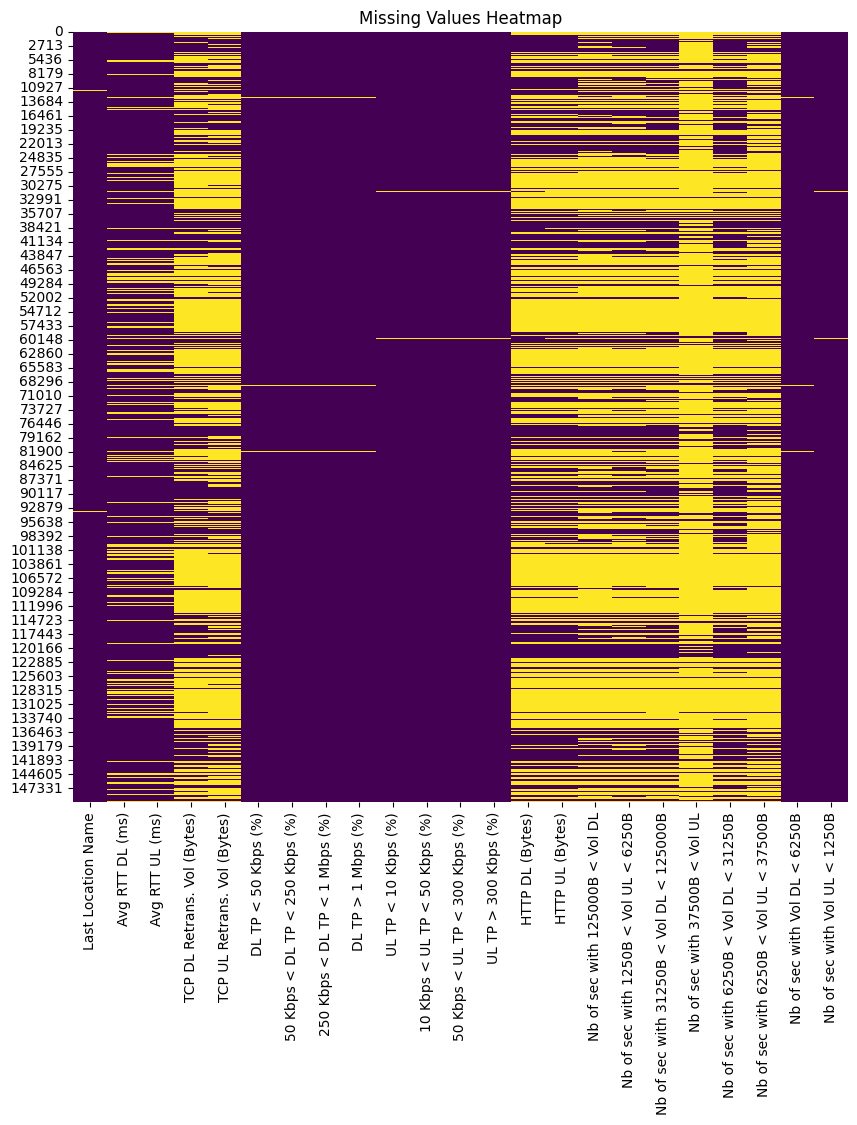

In [18]:
plot_missed = Plot(df)
plot_missed.plot_missing_values_heatmap(df[null_columns_greater_than_0])

#### Attributes of Missed value with There distribution

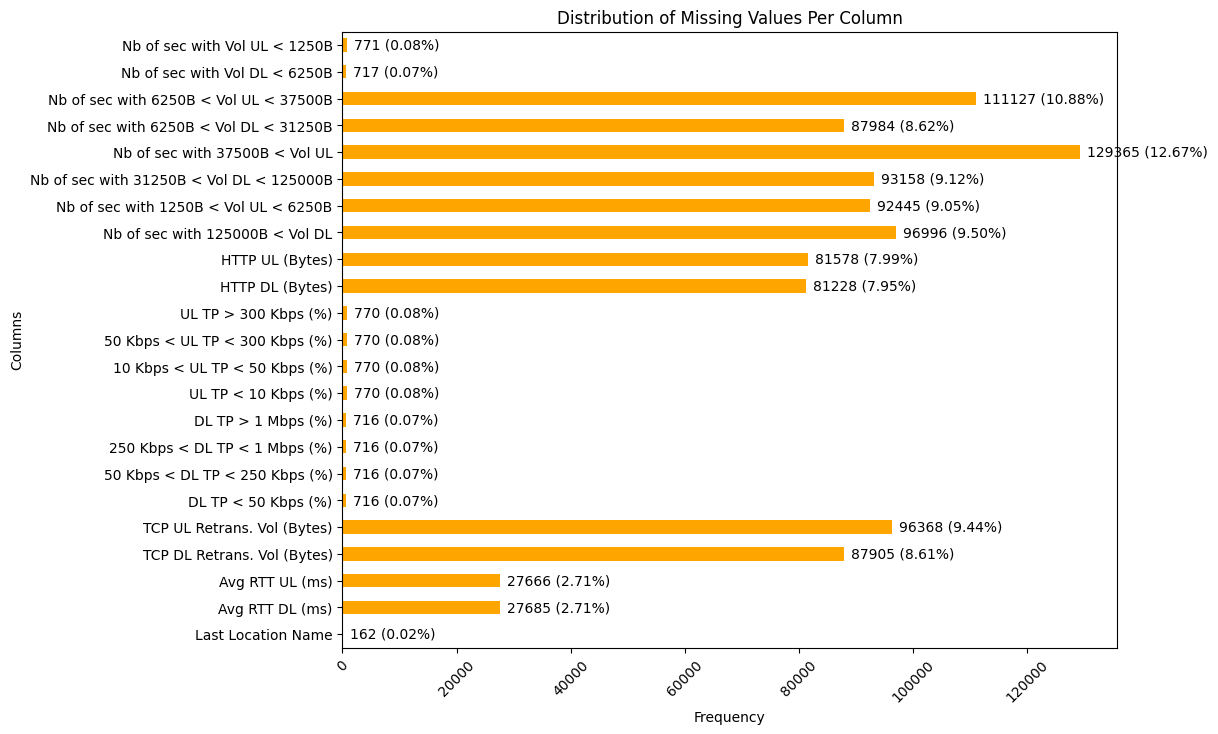

In [19]:
# Initialize the Plot class
plot_instance = Plot(df)
# Call the method to plot the distribution of missing values
plot_instance.distribution_of_missing_values(null_columns_greater_than_0)

In [3]:
df = pd.read_csv('Before_handling_all_missed_values.csv')

In [4]:
plot = Plot(df)

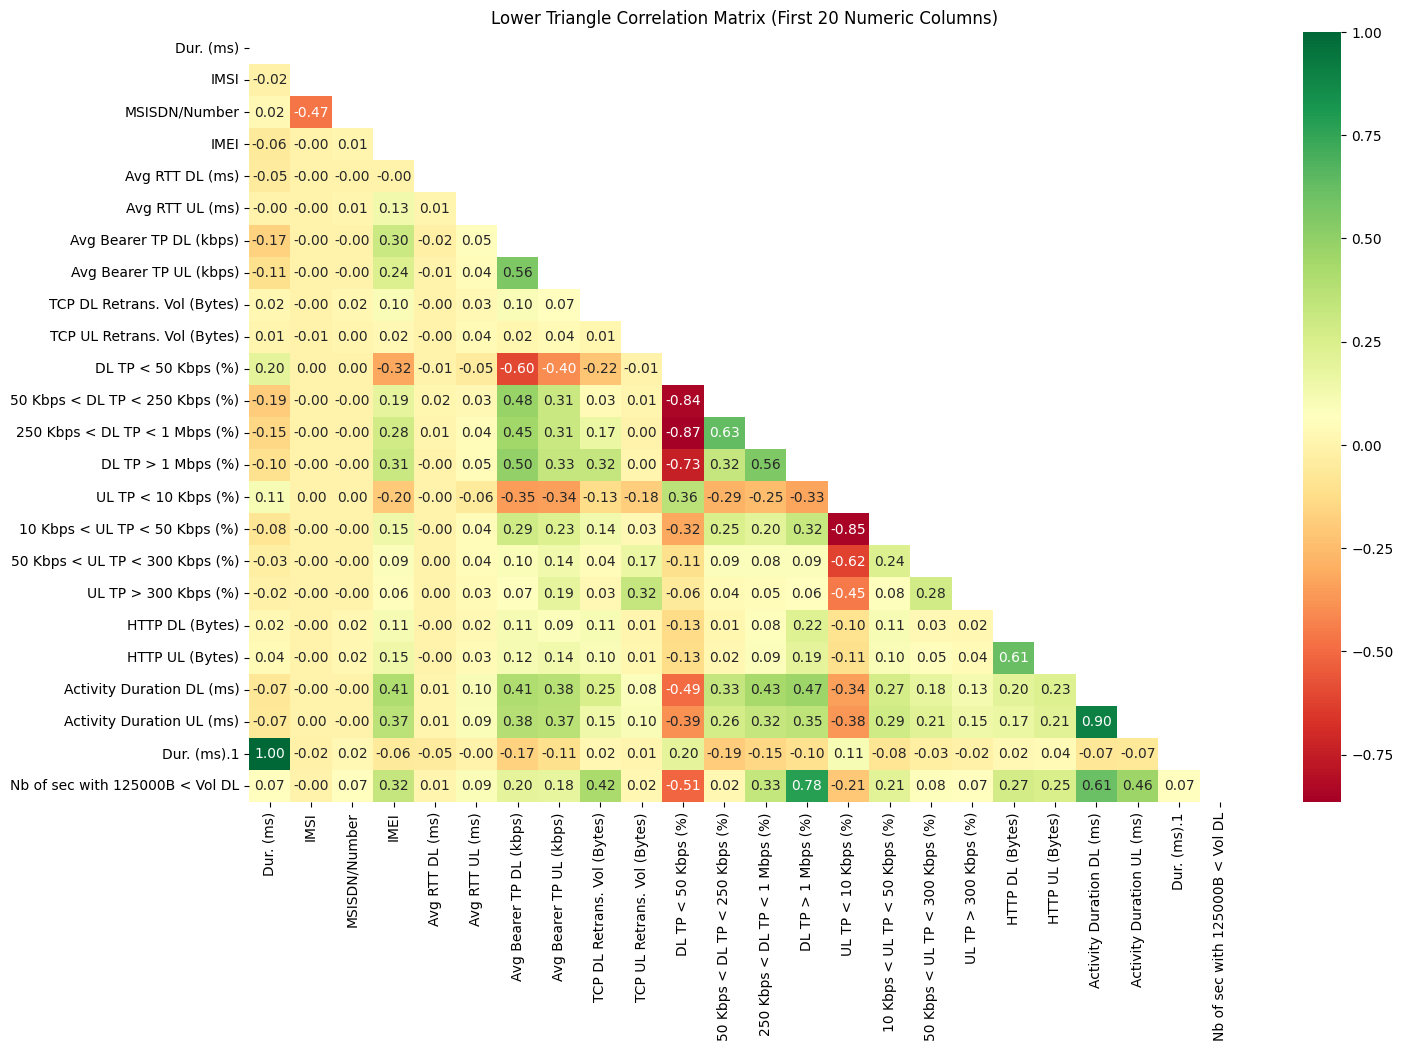

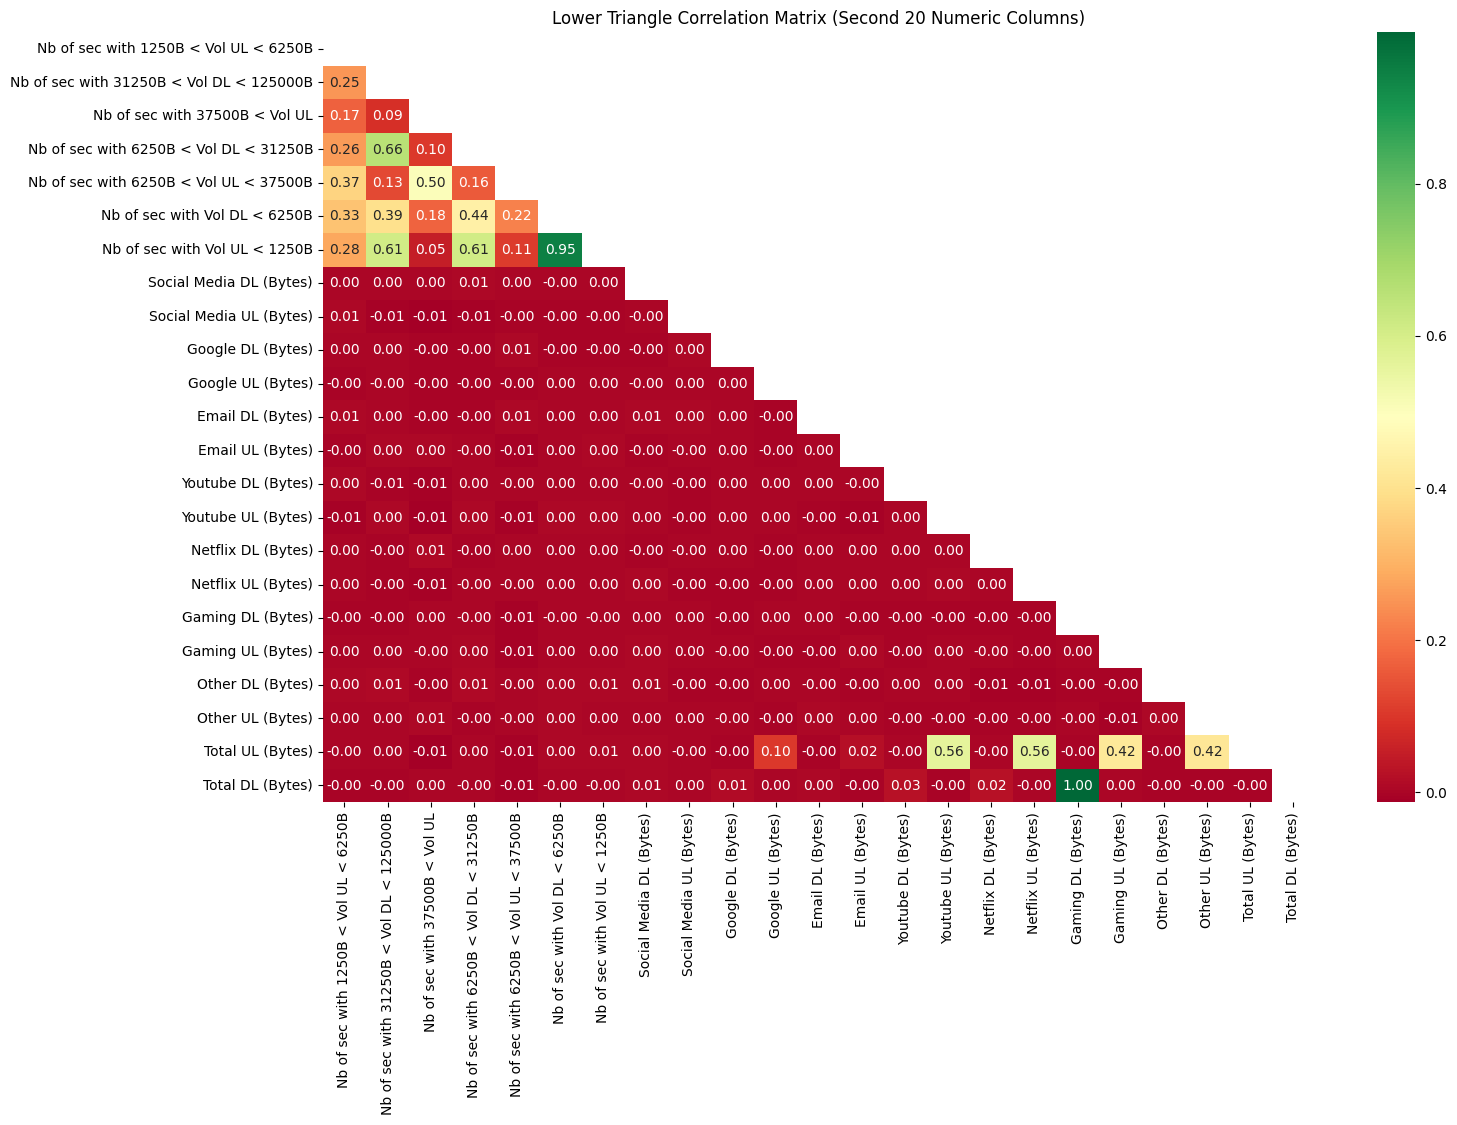

In [21]:
plot.analyze_correlation(df)

In [22]:
df[null_columns_greater_than_0].isna().sum()

Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87905
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              96996
Nb of sec with 1250B < Vol UL < 6250B        92445
Nb of sec with 31250B < Vol DL < 125000B     93158
Nb of sec with 37500B < Vol UL              129365
Nb of sec with 6250B < Vol DL <

Skewness for First Group of Numeric Columns:
Dur. (ms)                        3.963365
IMSI                            40.987336
MSISDN/Number                  332.227215
IMEI                             1.070670
Avg RTT DL (ms)                 66.753873
Avg RTT UL (ms)                 28.498032
Avg Bearer TP DL (kbps)          2.587838
Avg Bearer TP UL (kbps)          4.499479
TCP DL Retrans. Vol (Bytes)     15.871616
dtype: float64


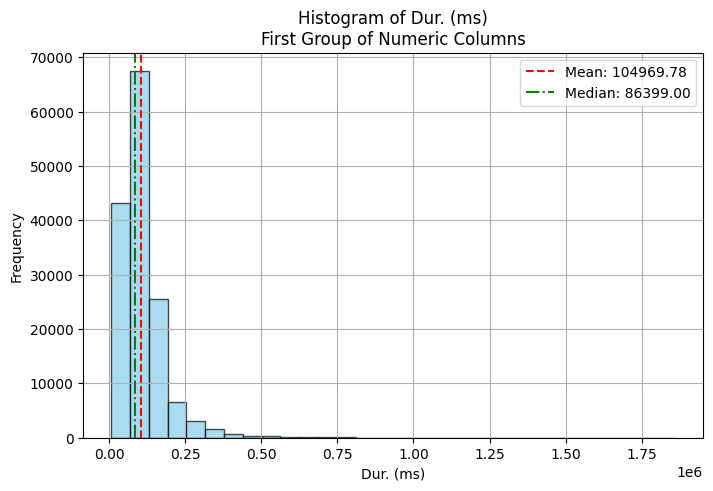

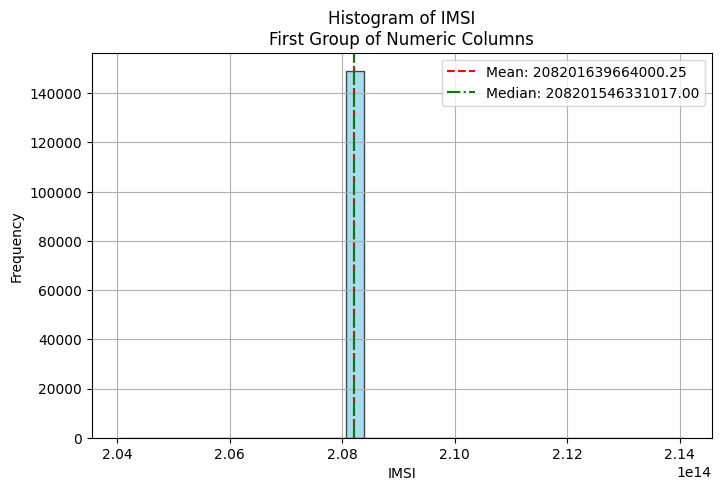

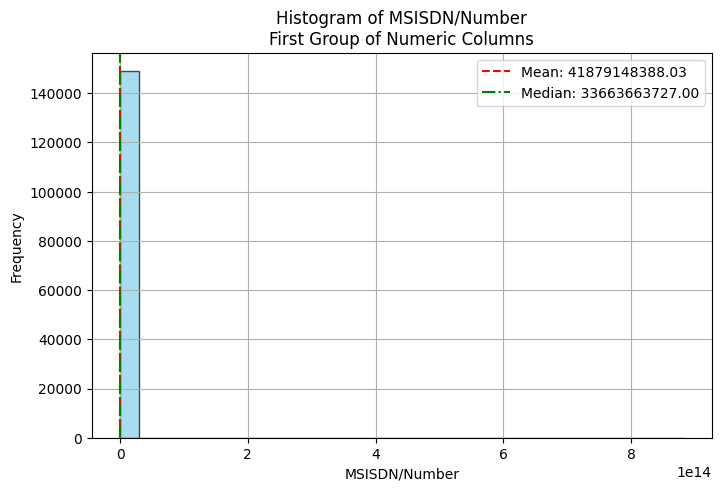

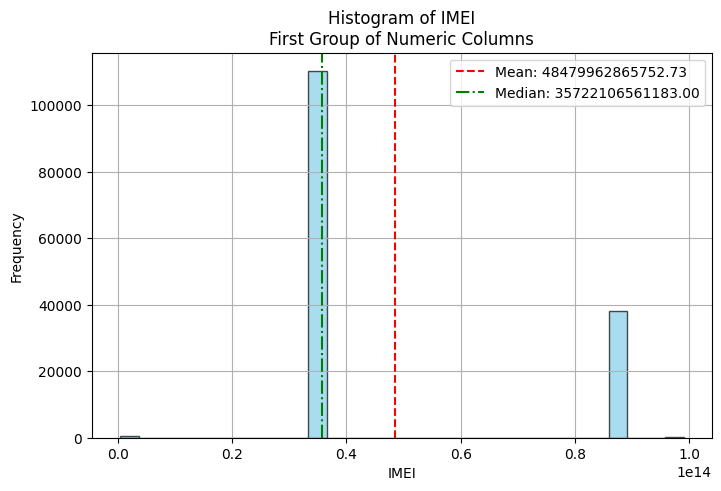

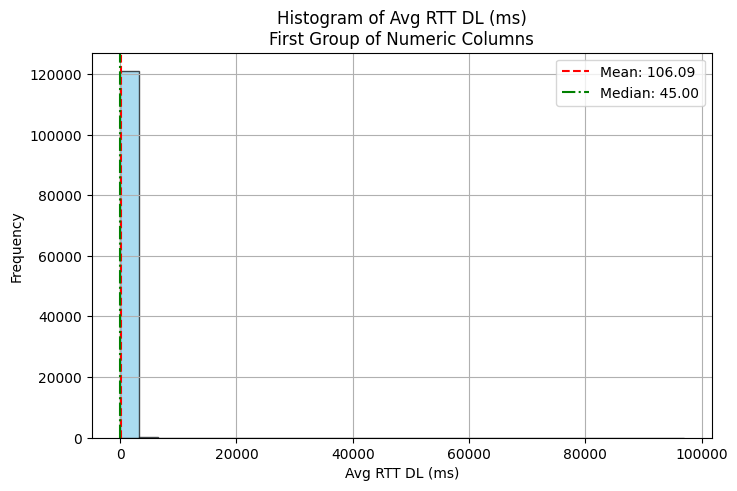

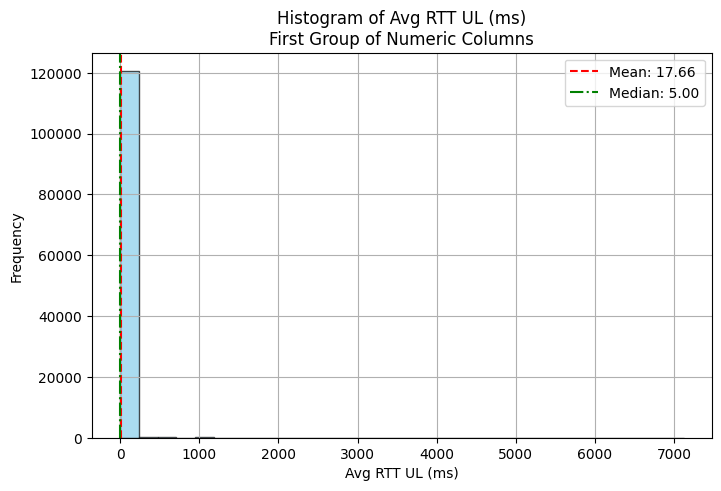

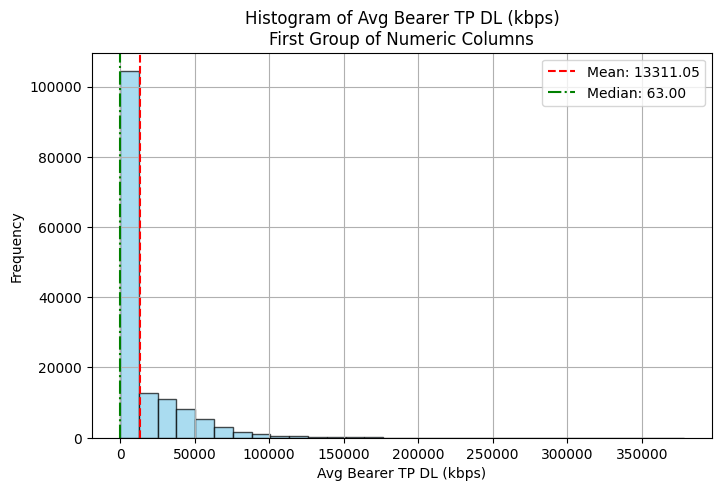

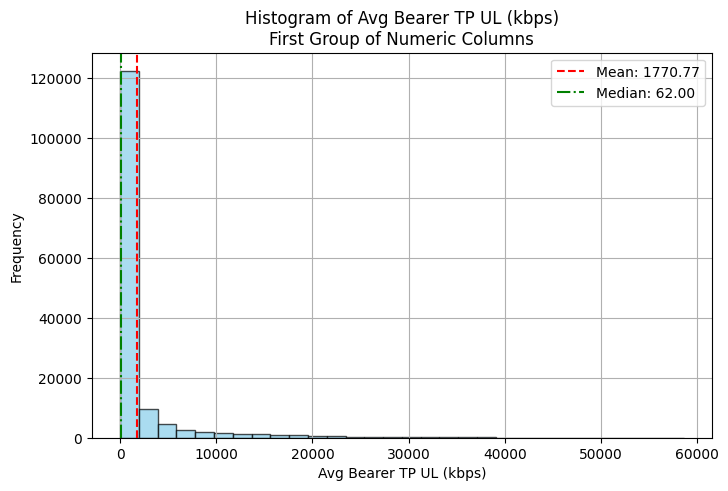

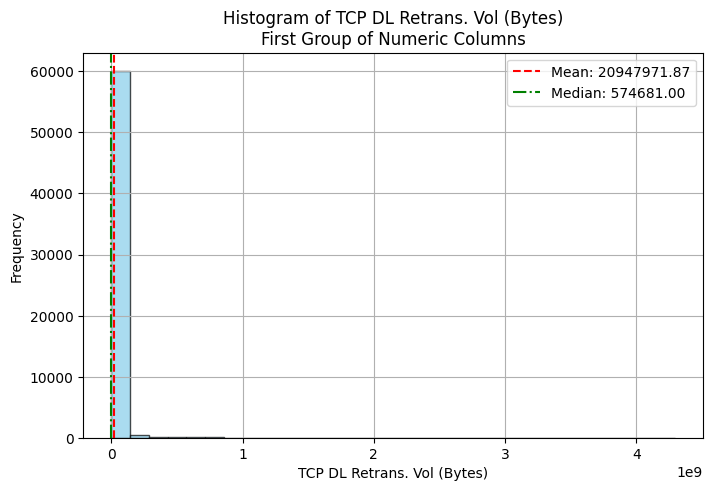

Skewness for Second Group of Numeric Columns:
TCP UL Retrans. Vol (Bytes)       83.543522
DL TP < 50 Kbps (%)               -2.298652
50 Kbps < DL TP < 250 Kbps (%)     3.273531
250 Kbps < DL TP < 1 Mbps (%)      4.571647
DL TP > 1 Mbps (%)                 5.361151
UL TP < 10 Kbps (%)               -8.985650
10 Kbps < UL TP < 50 Kbps (%)     10.946637
50 Kbps < UL TP < 300 Kbps (%)    21.832772
UL TP > 300 Kbps (%)              36.150531
HTTP DL (Bytes)                   38.738557
HTTP UL (Bytes)                   32.303786
Activity Duration DL (ms)          5.857531
dtype: float64


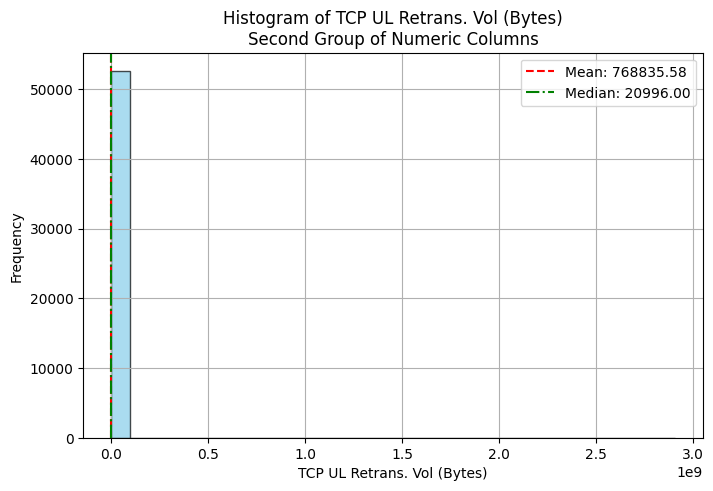

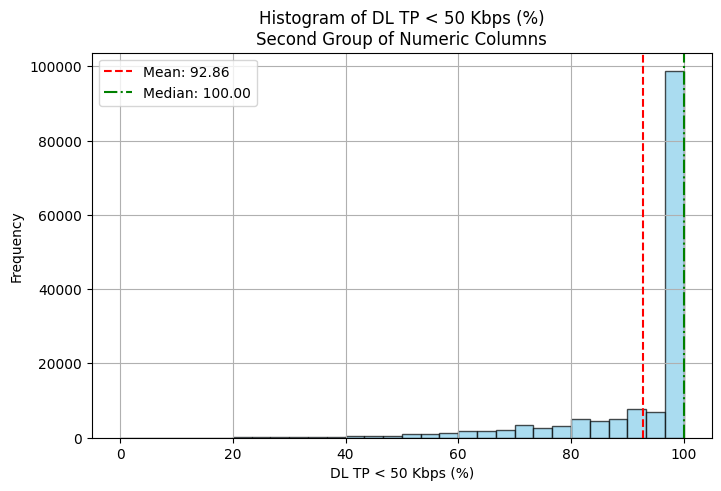

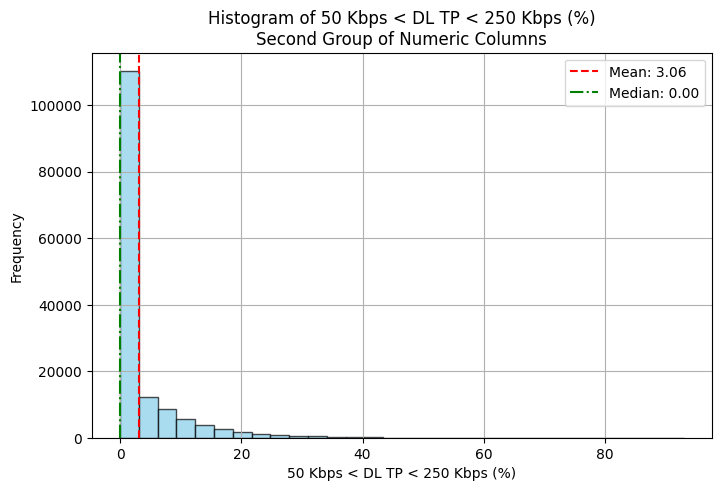

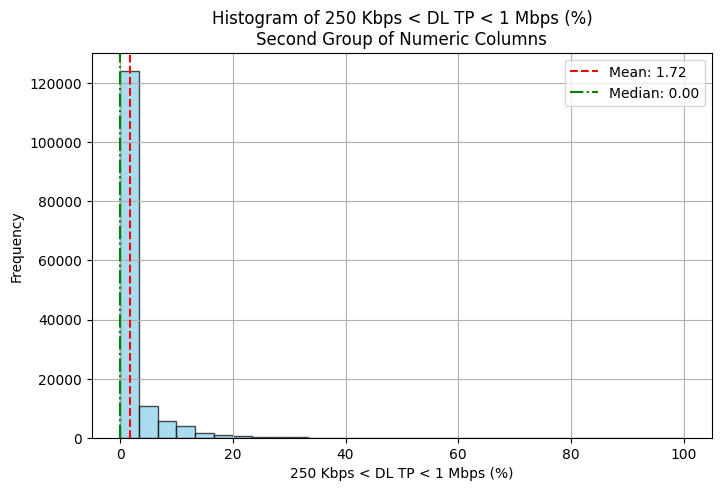

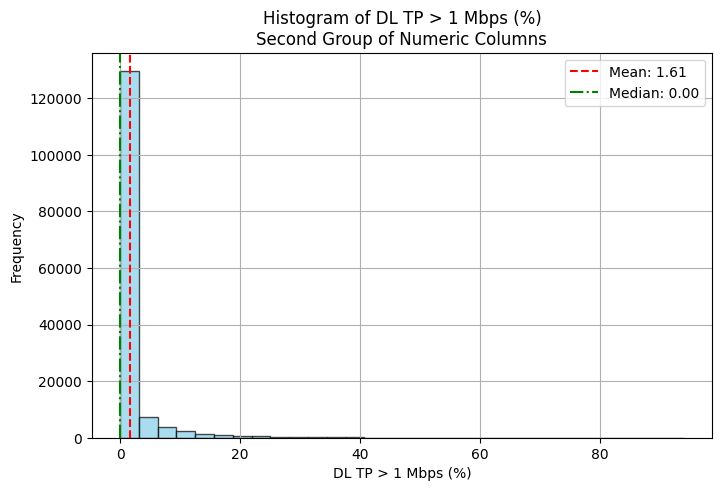

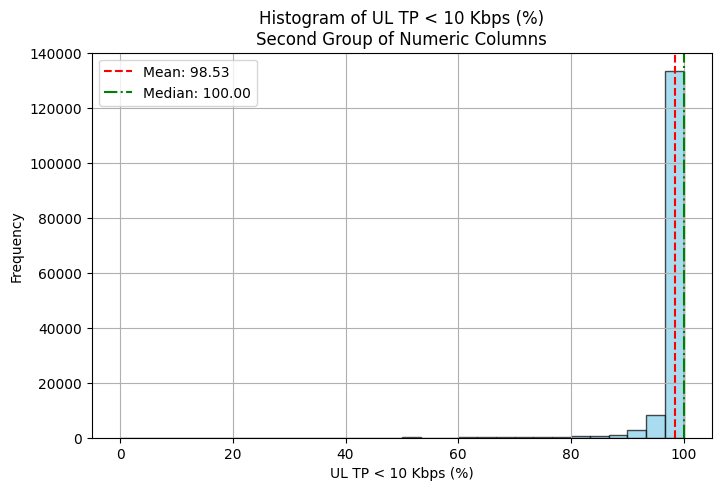

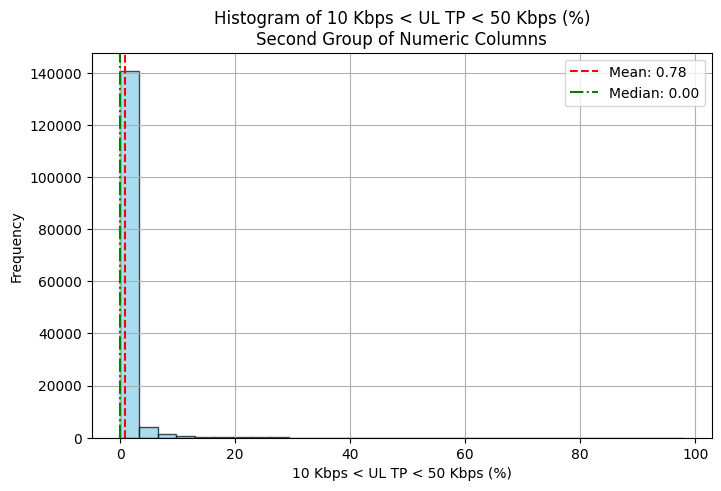

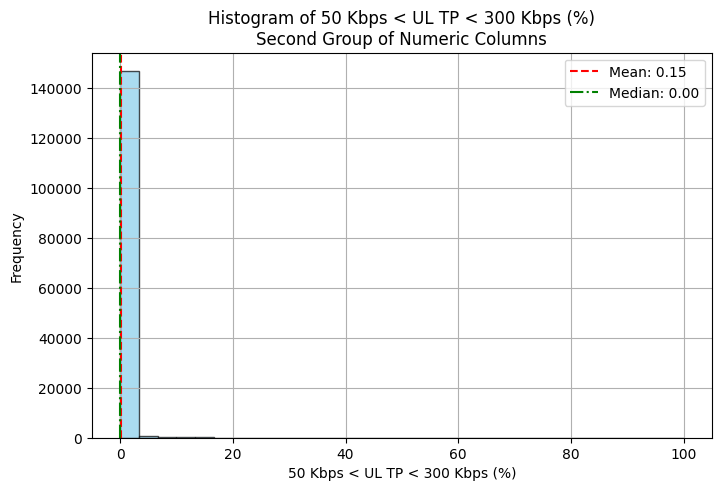

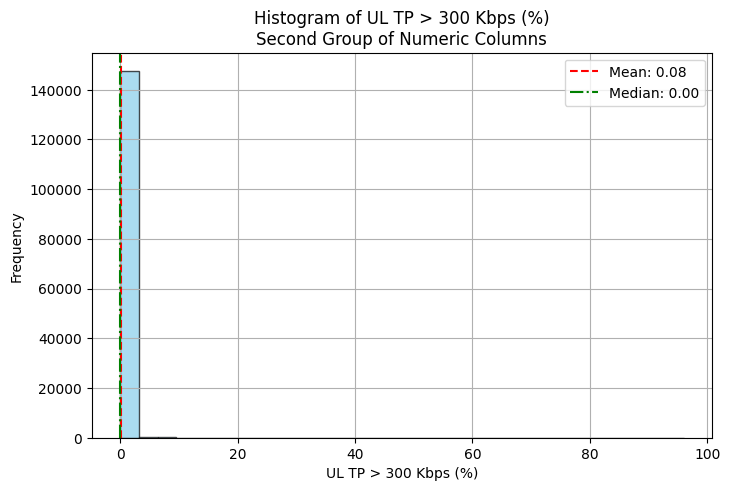

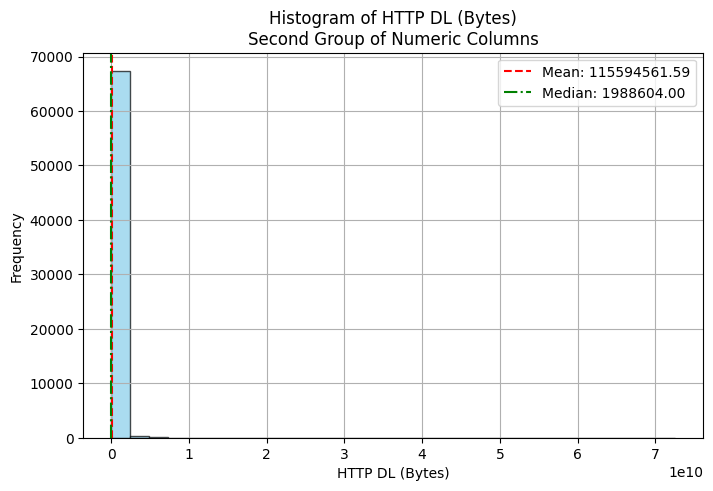

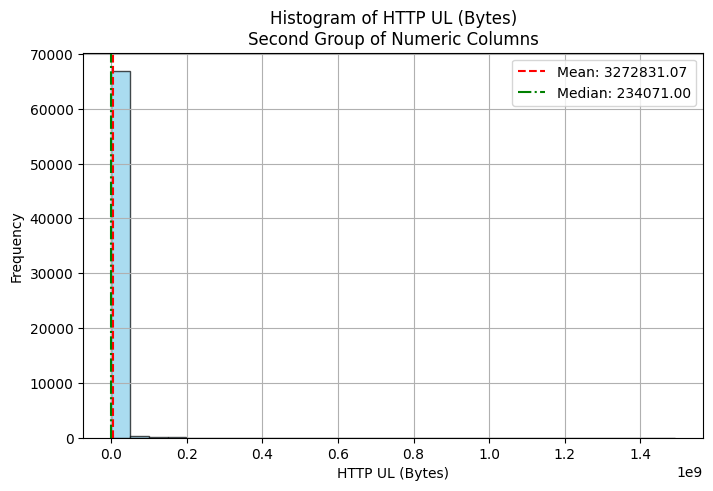

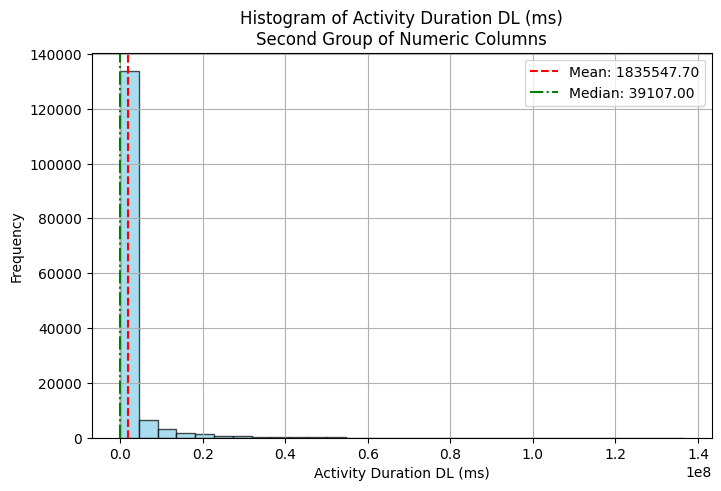

Skewness for Third Group of Numeric Columns:
Activity Duration UL (ms)                    7.365204
Dur. (ms).1                                  3.963365
Nb of sec with 125000B < Vol DL              6.567050
Nb of sec with 1250B < Vol UL < 6250B       21.956888
Nb of sec with 31250B < Vol DL < 125000B     6.588063
Nb of sec with 37500B < Vol UL              21.500723
Nb of sec with 6250B < Vol DL < 31250B       6.871164
Nb of sec with 6250B < Vol UL < 37500B      19.571475
Nb of sec with Vol DL < 6250B                9.027615
Nb of sec with Vol UL < 1250B                7.484437
Social Media DL (Bytes)                     -0.002051
Social Media UL (Bytes)                     -0.000359
Google DL (Bytes)                           -0.008323
Google UL (Bytes)                            0.002019
Email DL (Bytes)                            -0.002458
Email UL (Bytes)                             0.006944
dtype: float64


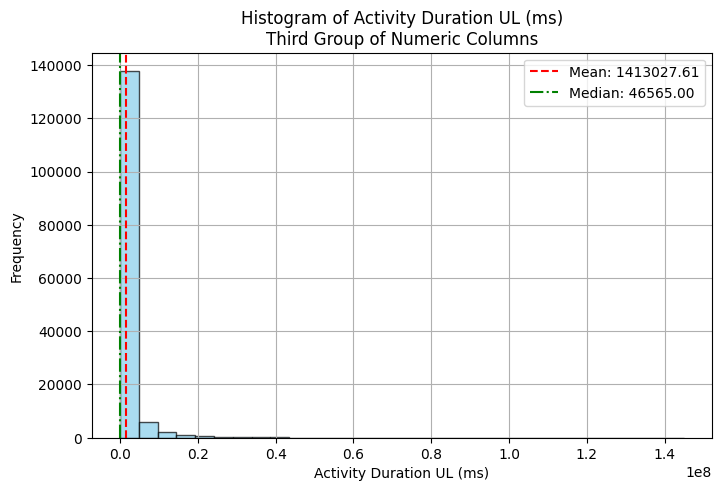

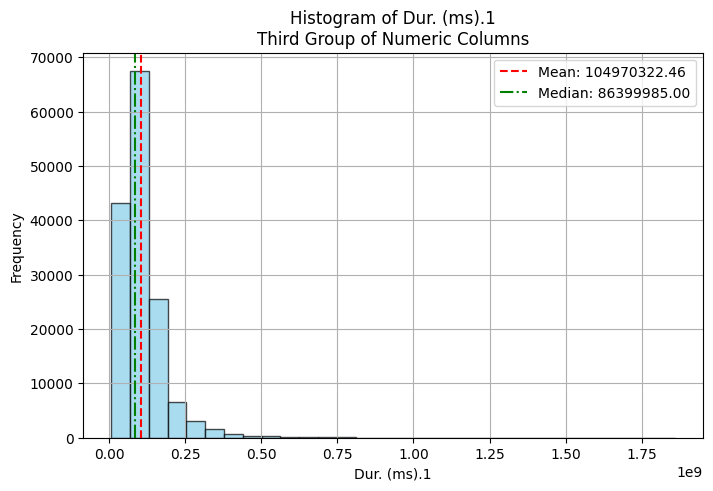

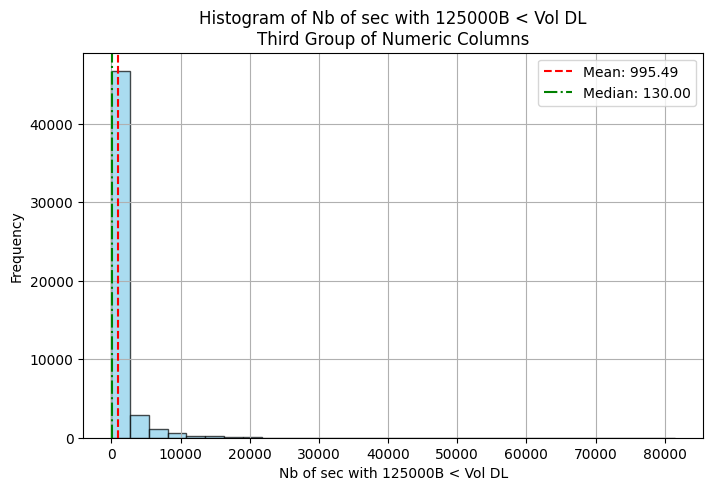

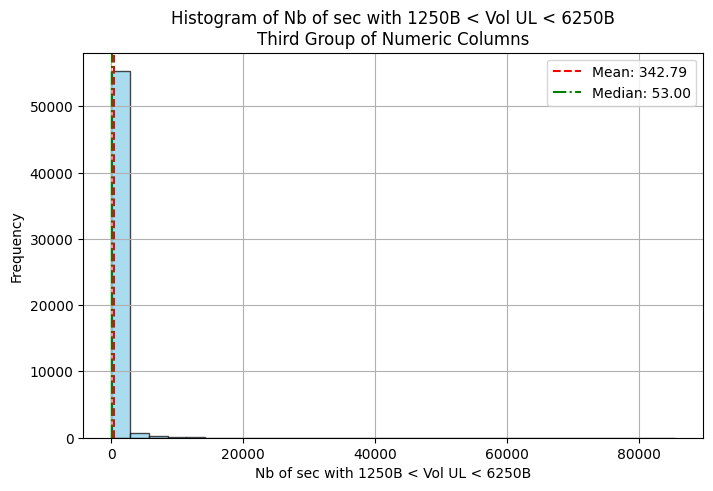

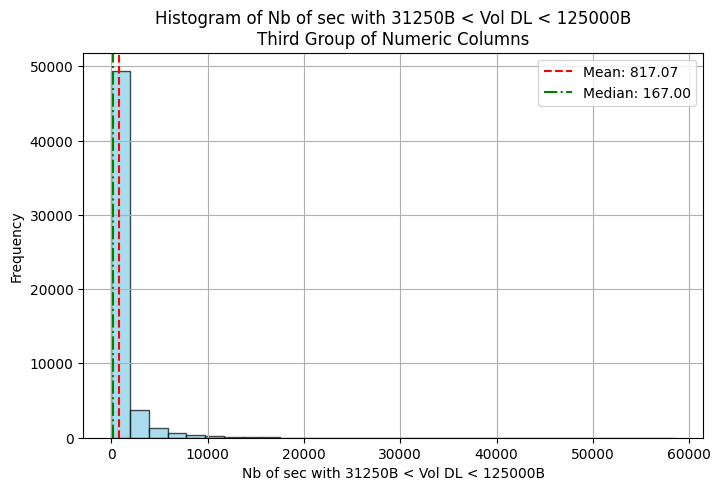

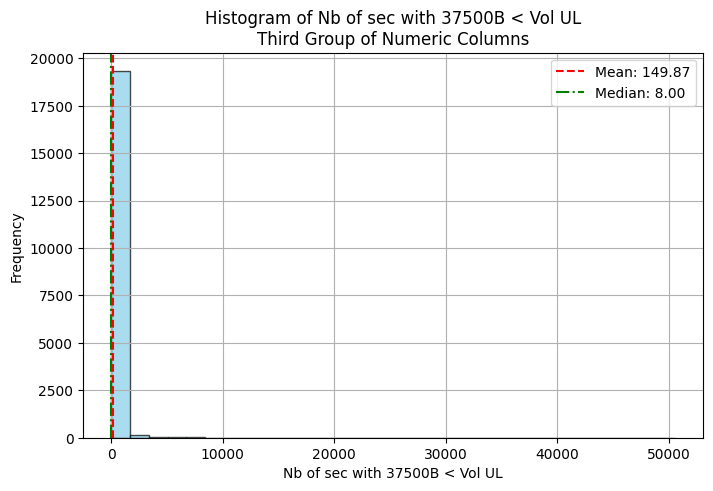

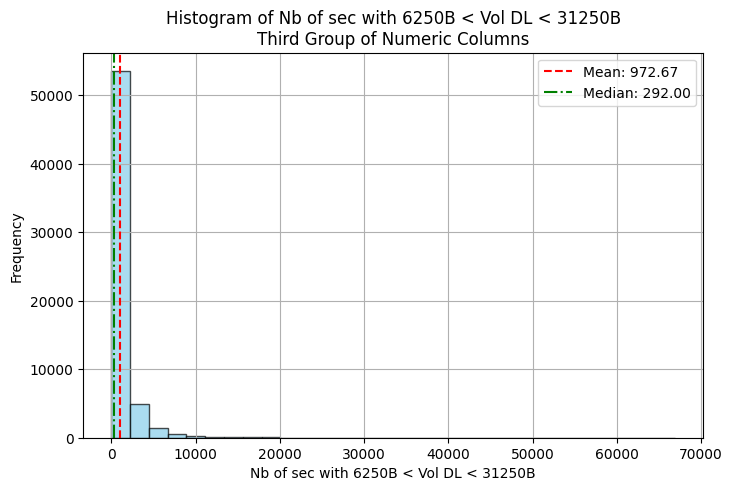

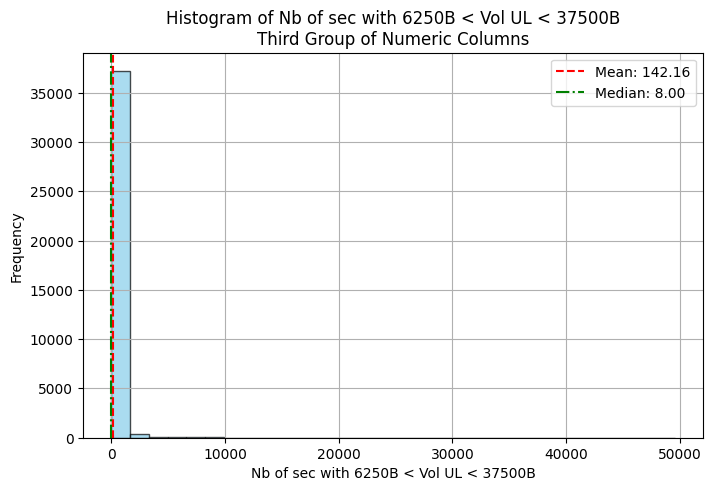

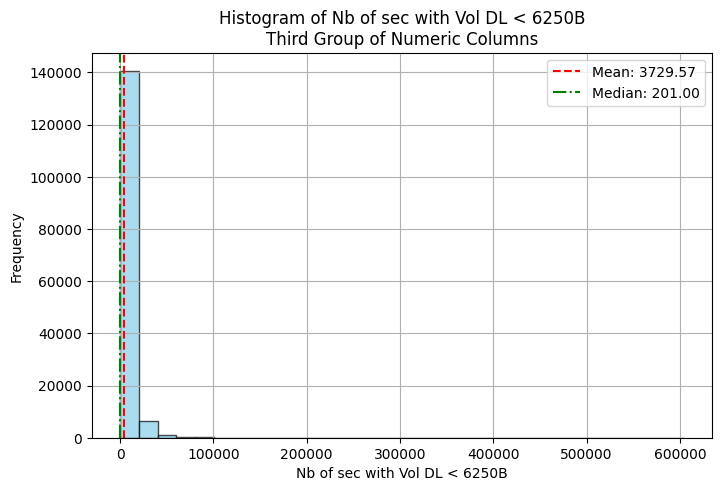

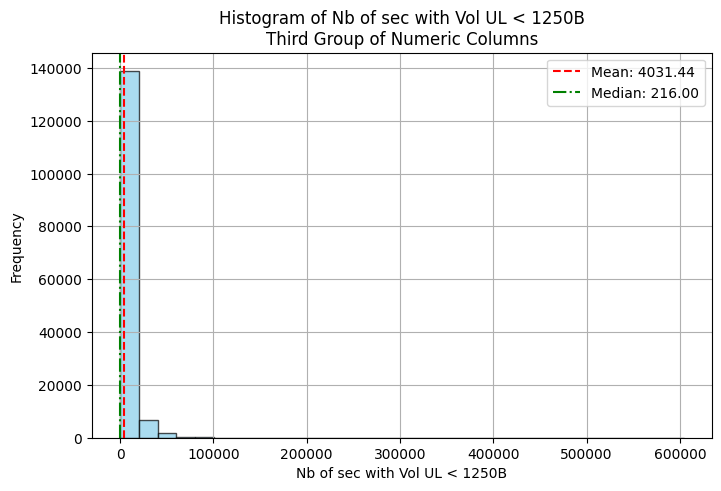

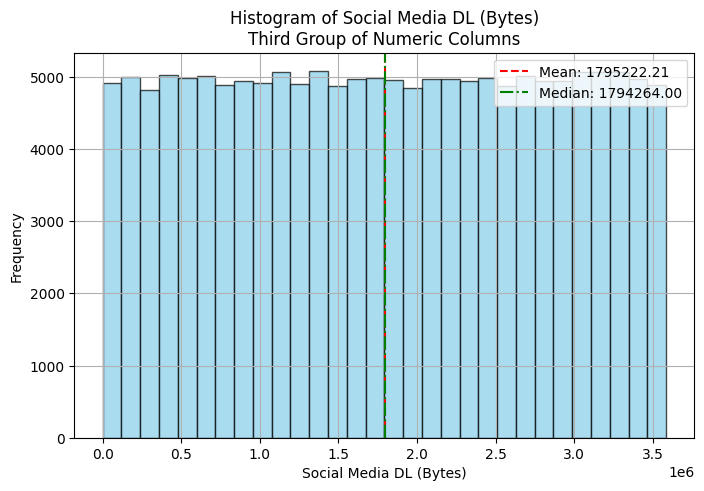

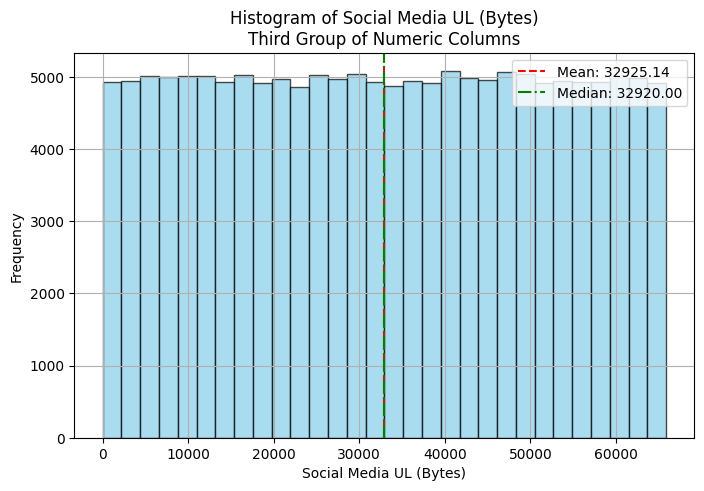

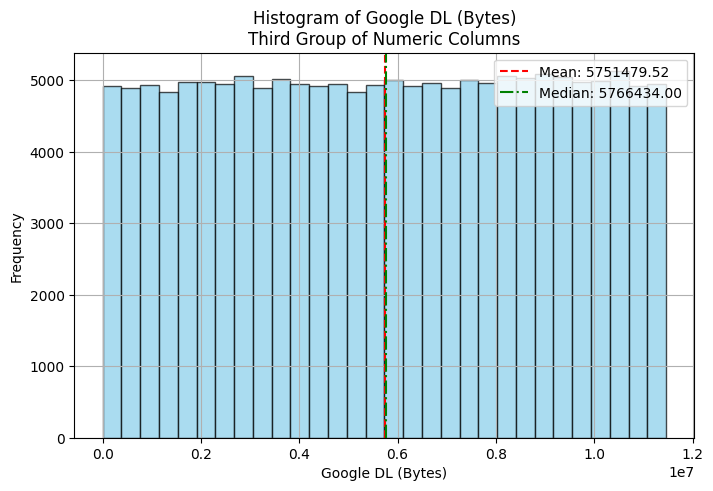

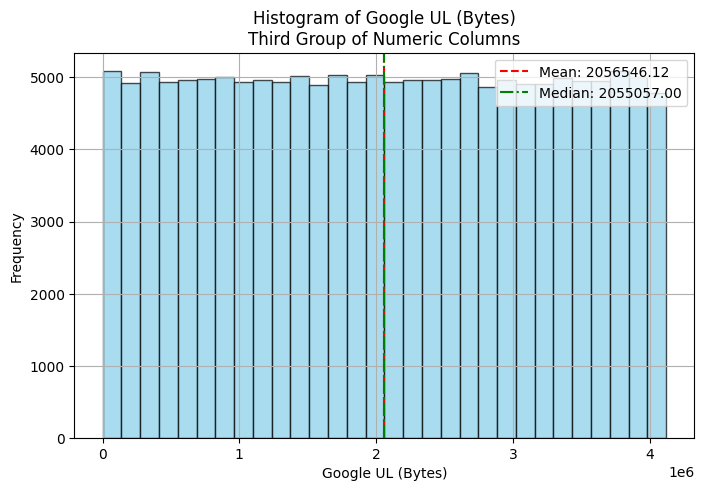

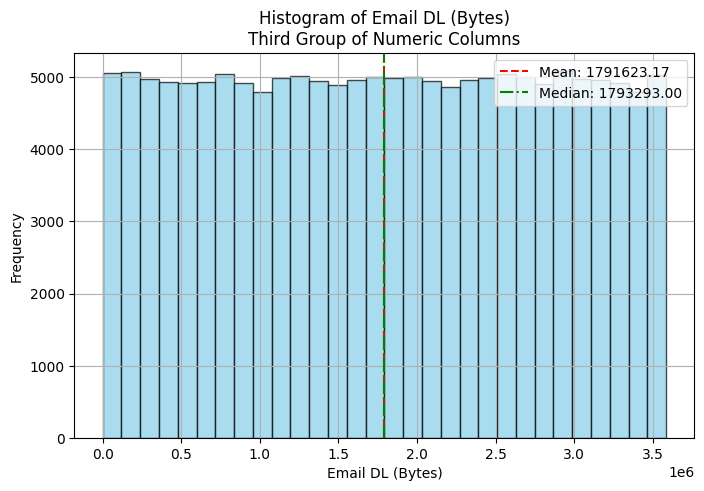

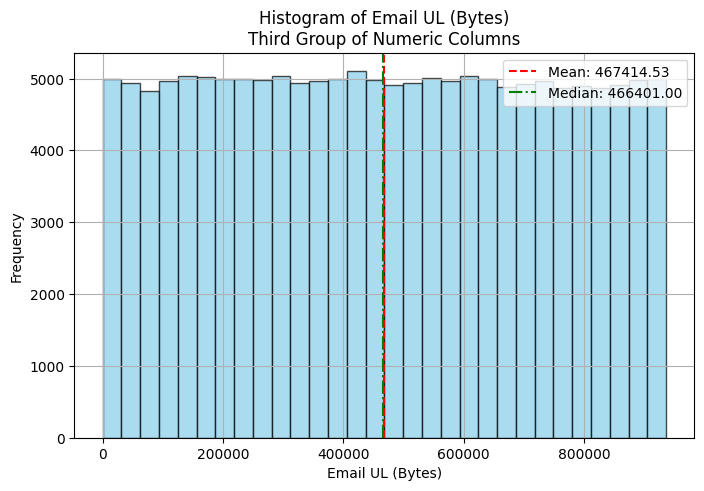

Skewness for Fourth Group of Numeric Columns:
Youtube DL (Bytes)    0.000486
Youtube UL (Bytes)   -0.000880
Netflix DL (Bytes)   -0.002196
Netflix UL (Bytes)   -0.000428
Gaming DL (Bytes)    -0.003864
Gaming UL (Bytes)    -0.002207
Other DL (Bytes)      0.001122
Other UL (Bytes)      0.001539
Total UL (Bytes)     -0.002009
Total DL (Bytes)     -0.003551
dtype: float64


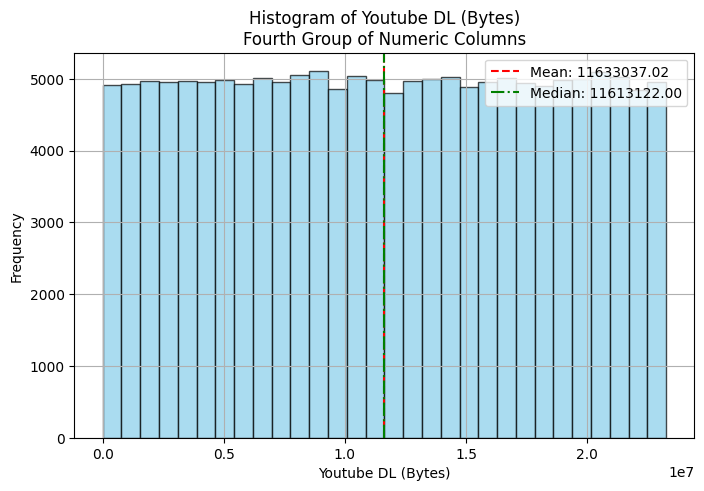

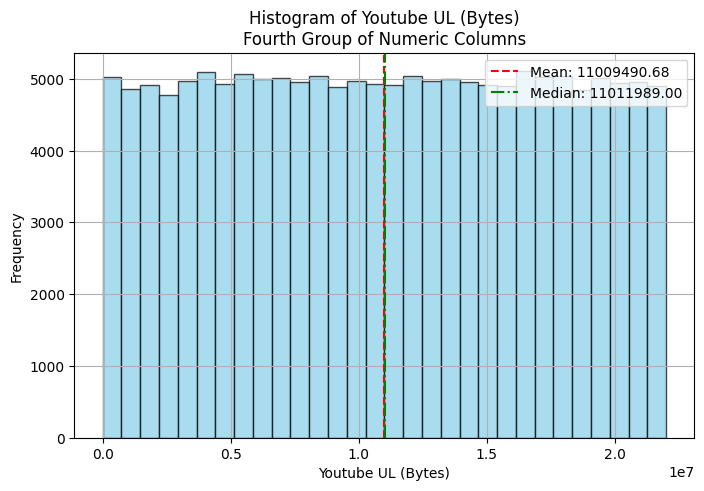

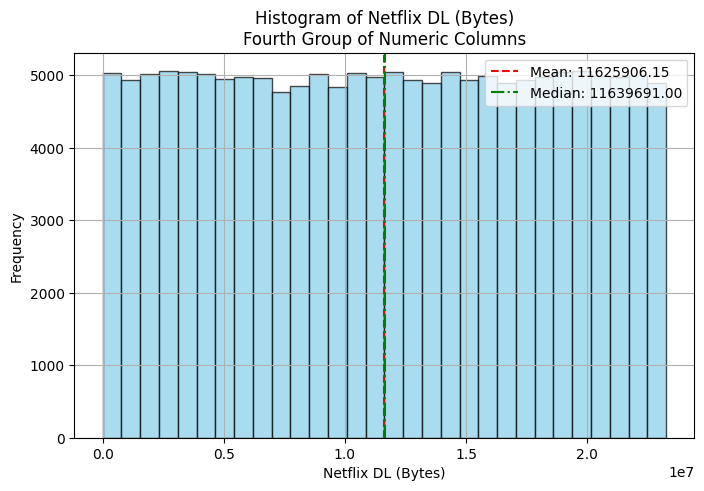

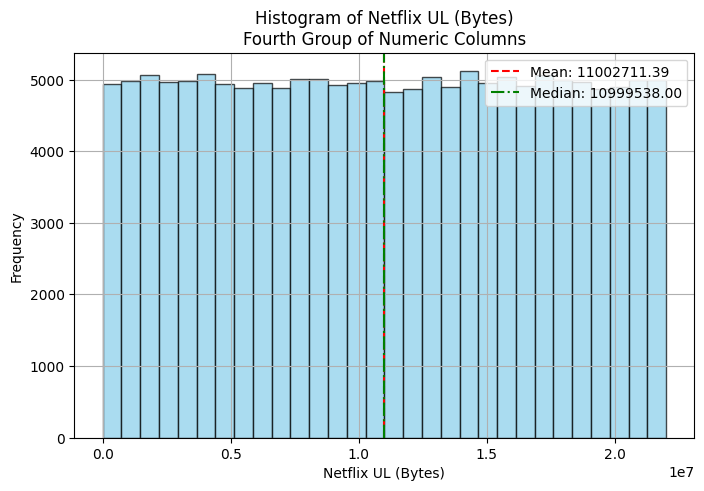

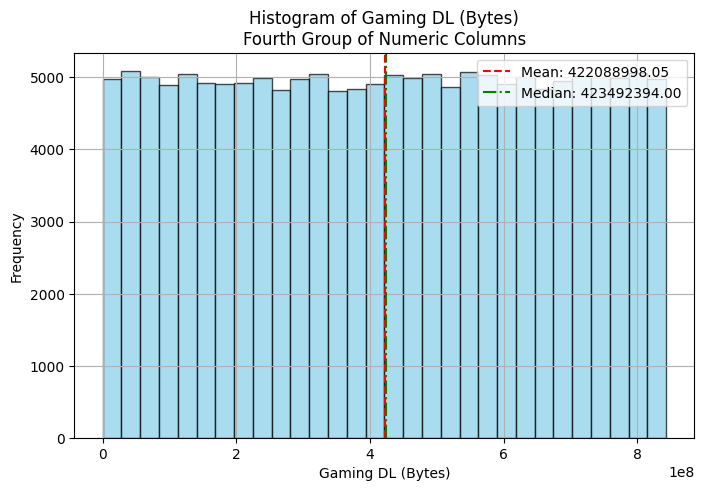

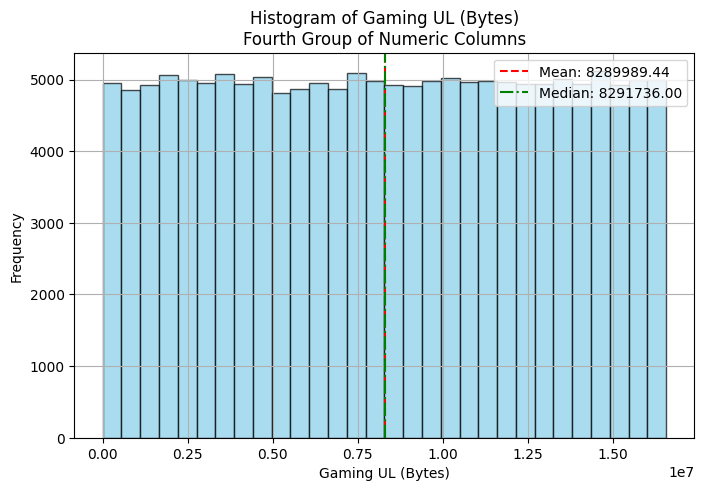

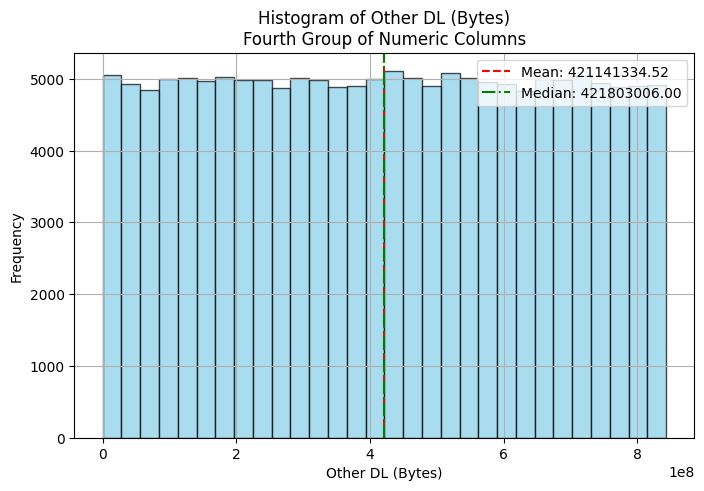

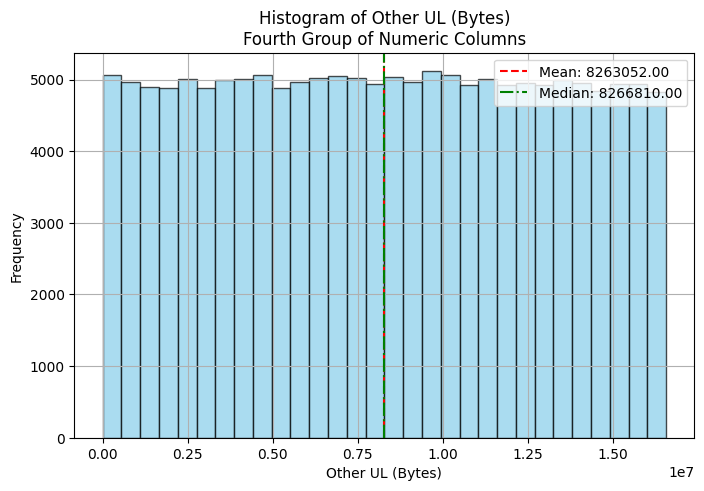

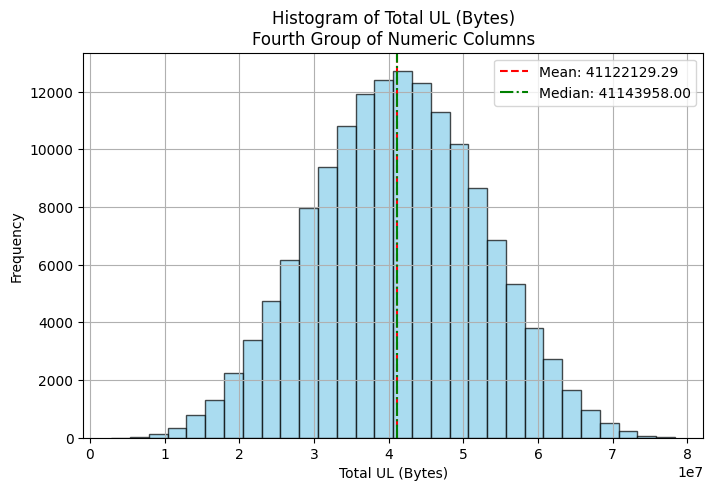

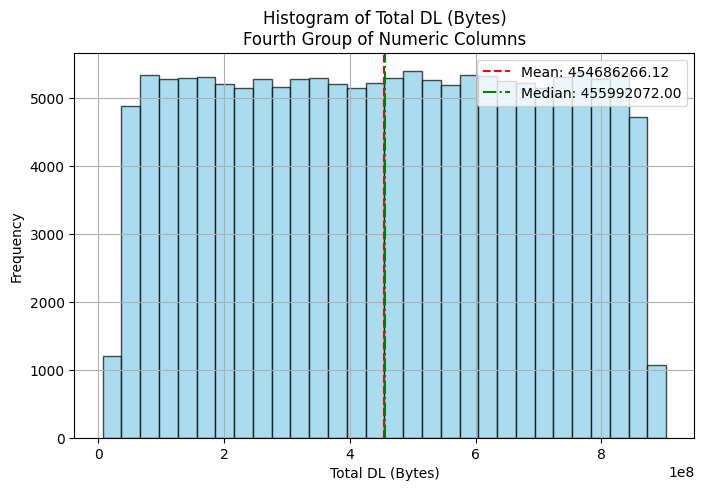

In [23]:
plot.analyze_numeric_columns(df)

In [53]:
df = pd.read_csv('Before_handling_all_missed_values.csv')

In [6]:
df.shape

(148999, 55)

In [5]:
null_columns_greater_than_0 = ['Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']

### Handling the Remaining Missing Values

In [6]:
# Loop over the columns with missing values and apply the quantile imputation strategy
for col in null_columns_greater_than_0:
    plot.quantile_impute_based_on_skewness(df, col)

Skipping column 'Last Location Name' because it is not numeric.


c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\plot.py:437: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(quantile_value, inplace=True)
c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\plot.py:437: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [9]:
# df.isna().sum()

### Drop the remaining

In [10]:
df.dropna(inplace=True)

### Distribution of Outlier

In [ ]:
outliers = eda.check_outliers()
outliers

In [60]:
# df.shape

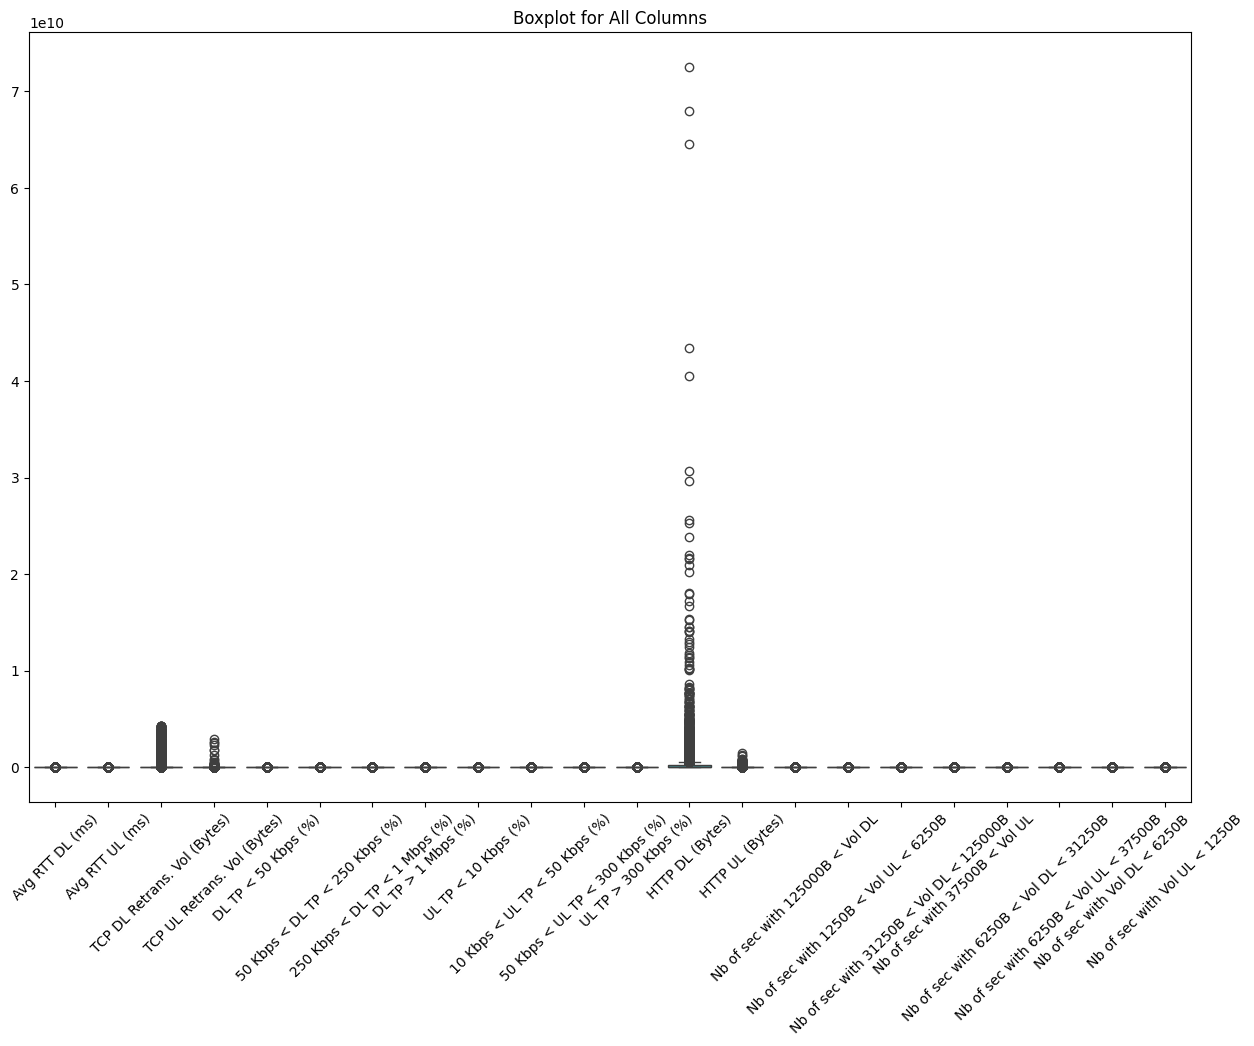

In [26]:
# Boxplots to visualize outliers
def visualized_outliers(df):
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df)
    plt.xticks(rotation=45)
    plt.title("Boxplot for All Columns")
    plt.show()
visualized_outliers(df[null_columns_greater_than_0])

In [28]:
# def drop_outliers(df, columns, threshold=1.5):
#     """
#     Removes outliers from the specified columns using the IQR method.

#     Parameters:
#     df (DataFrame): The input dataframe.
#     columns (list): List of numeric column names to check for outliers.
#     threshold (float): The IQR multiplier (default is 1.5).

#     Returns:
#     DataFrame: A new dataframe with outliers removed.
#     """
#     df_clean = df.copy()  # Create a copy to avoid modifying the original data

#     for col in columns:
#         if col in df_clean.select_dtypes(include=['number']).columns:
#             Q1 = df_clean[col].quantile(0.02)
#             Q3 = df_clean[col].quantile(0.98)
#             IQR = Q3 - Q1

#             lower_bound = Q1 - threshold * IQR
#             upper_bound = Q3 + threshold * IQR

#             df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
#         else:
#             print(f"Skipping '{col}' as it's not a numeric column.")

#     return df_clean


In [27]:
# numeric_columns = df.select_dtypes(include=['number']).columns  # Select numeric columns
# df_cleaned = drop_outliers(df, numeric_columns)

In [13]:
df.shape

(148837, 55)

In [14]:
df.to_csv('cleaned_data.csv', index=False)

In [15]:
df = pd.read_csv('cleaned_data.csv')

In [16]:
df.shape

(148837, 55)

### User Overview Analysis 

#### Start by identifying the top 10 handsets used by the customers.

In [ ]:
analysis = UserOverviewAnalysis(df)
result = analysis.top_10_handsets_by_cust("Handset Type", 10)
pd.set_option('display.float_format', '{:.0f}'.format)
print("Top 10 Handsets Used by Customers:")
result

Top 10 Handsets Used by Customers:


Handset Type  Count
314               Huawei B528S-23A  19749
53         Apple iPhone 6S (A1688)   9397
49          Apple iPhone 6 (A1586)   9002
1391                     undefined   8948
59          Apple iPhone 7 (A1778)   6296
73         Apple iPhone Se (A1723)   5176
66          Apple iPhone 8 (A1905)   4985
78         Apple iPhone Xr (A2105)   4561
952   Samsung Galaxy S8 (Sm-G950F)   4499
75          Apple iPhone X (A1901)   3808

#### Then, identify the top 3 handset manufacturers

In [18]:
result = analysis.top_10_handsets_by_cust("Handset Manufacturer", 3)
pd.set_option('display.float_format', '{:.0f}'.format)
print("Top 10 Handsets Used by Customers:")
result

Top 10 Handsets Used by Customers:


Handset Manufacturer  Count
5                  Apple  59405
103              Samsung  40652
52                Huawei  34326

#### Next, identify the top 5 handsets per top 3 handset manufacturer

In [20]:
results = analysis.top_handsets_per_top_manufacturers(
    manufacturer_column="Handset Manufacturer",
    handset_column="Handset Type",
    top_n_manufacturers=3,
    top_n_handsets=5
)

print("Top 3 Handset Manufacturers:", results["top_manufacturers"])
print("\nTop 5 Handsets per Top 3 Handset Manufacturers:")
results["top_handsets_per_manufacturer"]


Top 3 Handset Manufacturers: ['Apple', 'Samsung', 'Huawei']

Top 5 Handsets per Top 3 Handset Manufacturers:


Handset Manufacturer                    Handset Type  Count
35                 Apple         Apple iPhone 6S (A1688)   9397
31                 Apple          Apple iPhone 6 (A1586)   9002
41                 Apple          Apple iPhone 7 (A1778)   6296
55                 Apple         Apple iPhone Se (A1723)   5176
48                 Apple          Apple iPhone 8 (A1905)   4985
83                Huawei                Huawei B528S-23A  19749
104               Huawei                    Huawei E5180   2078
183               Huawei  Huawei P20 Lite Huawei Nova 3E   2014
182               Huawei                      Huawei P20   1476
223               Huawei                  Huawei Y6 2018    987
358              Samsung    Samsung Galaxy S8 (Sm-G950F)   4499
241              Samsung      Samsung Galaxy A5 Sm-A520F   3715
291              Samsung     Samsung Galaxy J5 (Sm-J530)   3688
283              Samsung     Samsung Galaxy J3 (Sm-J330)   3474
356              Samsung    Samsung Galaxy S7 (Sm-G930X)   3192

#### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   

Aggregate per user the following information in the column 

Top 10 customer by number of xDR sessions

In [ ]:
user_behavior = analysis.user_behavior_analysis(
    user_column="IMSI",
    session_column="Bearer Id"
)
print("Aggregated User Behavior (Number of xDR Sessions):")
user_behavior.head(10)


Aggregated User Behavior (Number of xDR Sessions):


IMSI  Number_of_xDR_Sessions
36595  208201402778052                      18
71491  208201715944176                      17
15801  208201007176097                      17
87772  208201906760163                      16
25109  208201009693091                      15
100584 208202100881019                      15
10485  208200853859127                      13
84221  208201771999179                      12
89264  208201907543212                      12
89650  208201907697231                      12

Top ten customer by duration of session 

In [22]:
session_duration_data = analysis.session_duration_analysis(
    duration_column="Dur. (ms)",
    user_column="IMSI",
    ul_column="Total UL (Bytes)",
    dl_column="Total DL (Bytes)"
)

session_duration_data.head(10)

IMSI  Total_UL   Total_DL  Total_Duration  \
15801  208201007176097 729577380 7770043342           18554   
71491  208201715944176 689483001 8156743493            9967   
100584 208202100881019 703478581 7811295382            9279   
36595  208201402778052 669650721 7301516540            8792   
10485  208200853859127 566326364 5052067690            8745   
36992  208201446042143 402180804 5279826530            6289   
89264  208201907543212 435587631 4540607412            6288   
21698  208201009074192 365404250 3490820797            5660   
33999  208201402435130 266222647 2334299294            5650   
2952   208200313716101 521518890 6610851624            5322   

        Session Duration (hours)  
15801                          5  
71491                          3  
100584                         3  
36595                          2  
10485                          2  
36992                          2  
89264                          2  
21698                          2  
33999                          2  
2952                           1

Top 10 customer with the total download (DL) and upload (UL) data on each application

In [23]:
# Define metrics to aggregate
metrics = {
    'number_of_sessions': ('Bearer Id', 'count'),
    'total_session_duration': ('Dur. (ms)', 'sum'),
    'total_download': ('Total DL (Bytes)', 'sum'),
    'total_upload': ('Total UL (Bytes)', 'sum'),
    'youtube_dl': ('Youtube DL (Bytes)', 'sum'),
    'youtube_ul': ('Youtube UL (Bytes)', 'sum'),
    'netflix_dl': ('Netflix DL (Bytes)', 'sum'),
    'netflix_ul': ('Netflix UL (Bytes)', 'sum'),
    'gaming_dl': ('Gaming DL (Bytes)', 'sum'),
    'gaming_ul': ('Gaming UL (Bytes)', 'sum'),
    'other_dl': ('Other DL (Bytes)', 'sum'),
    'other_ul': ('Other UL (Bytes)', 'sum'),
}

# Call the method
aggregated_data = analysis.aggregate_user_metrics(
    user_column="IMSI",
    metrics=metrics
)

# Display the result
aggregated_data.head(10)


IMSI  number_of_sessions  total_session_duration  \
36595  208201402778052                  18                 8791927   
71491  208201715944176                  17                 9966898   
15801  208201007176097                  17                18553754   
87772  208201906760163                  16                 4035428   
25109  208201009693091                  15                 4865947   
100584 208202100881019                  15                 9279434   
10485  208200853859127                  13                 8744914   
73492  208201716367238                  12                 4059652   
2952   208200313716101                  12                 5321667   
89650  208201907697231                  12                 5207990   

        total_download  total_upload  youtube_dl  youtube_ul  netflix_dl  \
36595       7301516540     669650721   164048706   210434341   199479238   
71491       8156743493     689483001   199823443   194546775   179585986   
15801       7770043342     729577380   237883033   215075736   193912238   
87772       7081602462     624260321   119658146   138332942   196277206   
25109       7309541816     581568792   158665235   158745337   161626462   
100584      7811295382     703478581   194068298   202220900   146500839   
10485       5052067690     566326364   141972692   173258618   167932406   
73492       5155901264     466330265   118129859    96634053   163602702   
2952        6610851624     521518890   174245981   128923126   167023809   
89650       5096079437     391775856    83169358    96517390   151330389   

        netflix_ul  gaming_dl  gaming_ul   other_dl  other_ul  
36595    129246502 6745733519  141838597 8025476831 142400945  
71491    181815060 7622035401  127396833 7495297541 143966031  
15801    163068369 7171883799  154789688 6201652608 152930478  
87772    203241873 6609900470  115658741 6182550577 134864910  
25109    147466697 6863307038  107260559 6665073714 133441436  
100584   188142430 7316364172  144681056 4590038280 126096213  
10485    146007082 4623424261  102197663 4837533804 103984990  
73492    142337088 4740903330  110192303 4172594367  79892668  
2952     151323737 6170942911   97676681 3988504057 113141379  
89650    114043873 4766392734   80270693 4059957856  69984867

Customer with total download (DL) and upload (UL) data

In [24]:
application_data = analysis.aggregate_application_data()

application_data.head(10)

IMSI  Total Youtube (Bytes) DL_UL  Total Netflix (Bytes) DL_UL  \
0 204047108489451                     40940710                     28846230   
1 204080810288647                     11959905                     26592300   
2 208200101016140                     19882439                     31830562   
3 208200101127285                     25657632                     27785852   
4 208200101148045                     13840201                     57343415   
5 208200101148074                     19596808                     34177184   
6 208200101148075                     50907243                     29882137   
7 208200101148136                     11823461                     17047546   
8 208200101148139                     16310061                     25274811   
9 208200101148152                     35885492                     25595503   

   Total Gaming (Bytes) DL_UL  Total Other (Bytes) DL_UL  
0                    43070260                  401360457  
1                   178048738                  470526473  
2                     9124516                  515973704  
3                   344105897                  309610741  
4                   917684766                 1079435419  
5                   632745679                  549222257  
6                   835218898                  479778260  
7                   939598732                 1069429486  
8                   400273809                  799065942  
9                   290007171                  354263472

### Segment Users into Decile Classes

In [25]:
decile_data = analysis.aggregate_data_with_deciles()
decile_data

Decile  Total Data (Bytes)  Total Youtube (Bytes)  Total Netflix (Bytes)  \
0       1       9912426938717           248868547333           249350953408   
1       2      11090638949885           276435237563           278410003163   
2       3      11834406276814           296587076243           297619884442   
3       4      10986215541479           274962655465           272333887414   
4       5       9531938181874           235676051741           237331694949   
5       6      11755560517989           293132689892           292889987060   
6       7      11155766641986           279080988507           276140688454   
7       8      14288745765101           358054239036           358417822278   
8       9      16979593328045           424422427803           425174844750   
9      10      27177595345009           682901998663           680317818339   

   Total Gaming (Bytes)  Total Other (Bytes)  
0         4716161892077        4698045545899  
1         5310657164557        5225136544602  
2         5629334680644        5610864635485  
3         5210313829924        5228605168676  
4         4512951442235        4545978992949  
5         5575041977218        5594495863819  
6         5342475692144        5258069272881  
7         6788951466337        6783322237450  
8         8073854176641        8056141878851  
9        12901946744773       12912428783234

### Basic Metrics Analysis
#### Descriptive Statistics

In [26]:
aggregated_data['Dur. (ms)'] = aggregated_data['total_session_duration'] 
aggregated_data['Total Data (Bytes)'] = decile_data['Total Data (Bytes)'] 
aggregated_data['Total Youtube (Bytes)'] = decile_data['Total Youtube (Bytes)']
aggregated_data['Total Netflix (Bytes)'] = decile_data['Total Netflix (Bytes)']
aggregated_data['Total Other (Bytes)'] = decile_data['Total Other (Bytes)']
aggregated_data['Total Gaming (Bytes)'] = decile_data['Total Gaming (Bytes)'] 
metrics = aggregated_data[['Dur. (ms)', 'Total Data (Bytes)', 'Total Youtube (Bytes)', 'Total Netflix (Bytes)', 
                           'Total Gaming (Bytes)', 'Total Other (Bytes)']].describe()
median_values = aggregated_data.median()
std_deviation = aggregated_data.std()

# Print the basic metrics
metrics


Dur. (ms)  Total Data (Bytes)  Total Youtube (Bytes)  \
count     106757                  10                     10   
mean      146410      13471288748690           337012191225   
std       186114       5289938986237           133415278260   
min         7142       9531938181874           235676051741   
25%        71936      11012321393580           275330800990   
50%       102928      11455663579988           286106839200   
75%       172799      13675160893029           342687448338   
max     18553754      27177595345009           682901998663   

       Total Netflix (Bytes)  Total Gaming (Bytes)  Total Other (Bytes)  
count                     10                    10                   10  
mean            336798758426         6406168906655        6391308892385  
std             132719925891         2508189352026        2515790252129  
min             237331694949         4512951442235        4545978992949  
25%             273285587674         5235399663582        5226003700620  
50%             285649995112         5458758834681        5426282568350  
75%             343218337819         6499047269914        6490207836959  
max             680317818339        12901946744773       12912428783234

In [27]:
print("Median values:\n")
median_values

Median values:



IMSI                     208201546187100
number_of_sessions                     1
total_session_duration            102928
total_download                 570435051
total_upload                    46805002
youtube_dl                      14605268
youtube_ul                      13880106
netflix_dl                      14640035
netflix_ul                      13883247
gaming_dl                      532655517
gaming_ul                       10447137
other_dl                       529947950
other_ul                        10379325
Dur. (ms)                         102928
Total Data (Bytes)        11455663579988
Total Youtube (Bytes)       286106839200
Total Netflix (Bytes)       285649995112
Total Other (Bytes)        5426282568350
Total Gaming (Bytes)       5458758834681
dtype: float64

In [28]:
print("Standard Deviation values:\n")
std_deviation

Standard Deviation values:



IMSI                       25409903687
number_of_sessions                   1
total_session_duration          186114
total_download               464828617
total_upload                  35671378
youtube_dl                    12328629
youtube_ul                    11599378
netflix_dl                    12324384
netflix_ul                    11610659
gaming_dl                    444281994
gaming_ul                      8737437
other_dl                     443973763
other_ul                       8710434
Dur. (ms)                       186114
Total Data (Bytes)       5289938986237
Total Youtube (Bytes)     133415278260
Total Netflix (Bytes)     132719925891
Total Other (Bytes)      2515790252129
Total Gaming (Bytes)     2508189352026
dtype: float64

### Non-Graphical Univariate Analysis
#### Dispersion Metrics

In [29]:
analysis = UserOverviewAnalysis(aggregated_data)

columns_to_analyze = ['Dur. (ms)', 'Total Data (Bytes)', 'Total Youtube (Bytes)', 
                      'Total Netflix (Bytes)', 'Total Gaming (Bytes)', 'Total Other (Bytes)']

dispersion_results = analysis.calculate_dispersion_metrics(columns=columns_to_analyze)

print("Dispersion Metrics Summary:")
dispersion_results.T

Dispersion Metrics Summary:


Dur. (ms)         Total Data (Bytes)  \
min                    7142              9531938181874   
max                18553754             27177595345009   
mean                 146410             13471288748690   
std                  186114              5289938986237   
variance        34638329160 27983454478111203794092032   
25th_percentile       71936             11012321393580   
50th_percentile      102928             11455663579988   
75th_percentile      172799             13675160893029   
range              18546612             17645657163135   
IQR                  100863              2662839499449   

                  Total Youtube (Bytes)   Total Netflix (Bytes)  \
min                        235676051741            237331694949   
max                        682901998663            680317818339   
mean                       337012191225            336798758426   
std                        133415278260            132719925891   
variance        17799636473130417913856 17614578728501011021824   
25th_percentile            275330800990            273285587674   
50th_percentile            286106839200            285649995112   
75th_percentile            342687448338            343218337819   
range                      447225946922            442986123390   
IQR                         67356647348             69932750145   

                     Total Gaming (Bytes)       Total Other (Bytes)  
min                         4512951442235             4545978992949  
max                        12901946744773            12912428783234  
mean                        6406168906655             6391308892385  
std                         2508189352026             2515790252129  
variance        6291013825618866776047616 6329200592706782187487232  
25th_percentile             5235399663582             5226003700620  
50th_percentile             5458758834681             5426282568350  
75th_percentile             6499047269914             6490207836959  
range                       8388995302538             8366449790285  
IQR                         1263647606332             1264204136338

### Graphical Univariate Analysis
 #### Plots
**Histogram:** Distribution of quantitative variables. <br>
**Box Plot:** Outliers and spread. <br>
**Bar Plot:** Total data by decile class. <br>

In [30]:
plotter = Plot(aggregated_data)

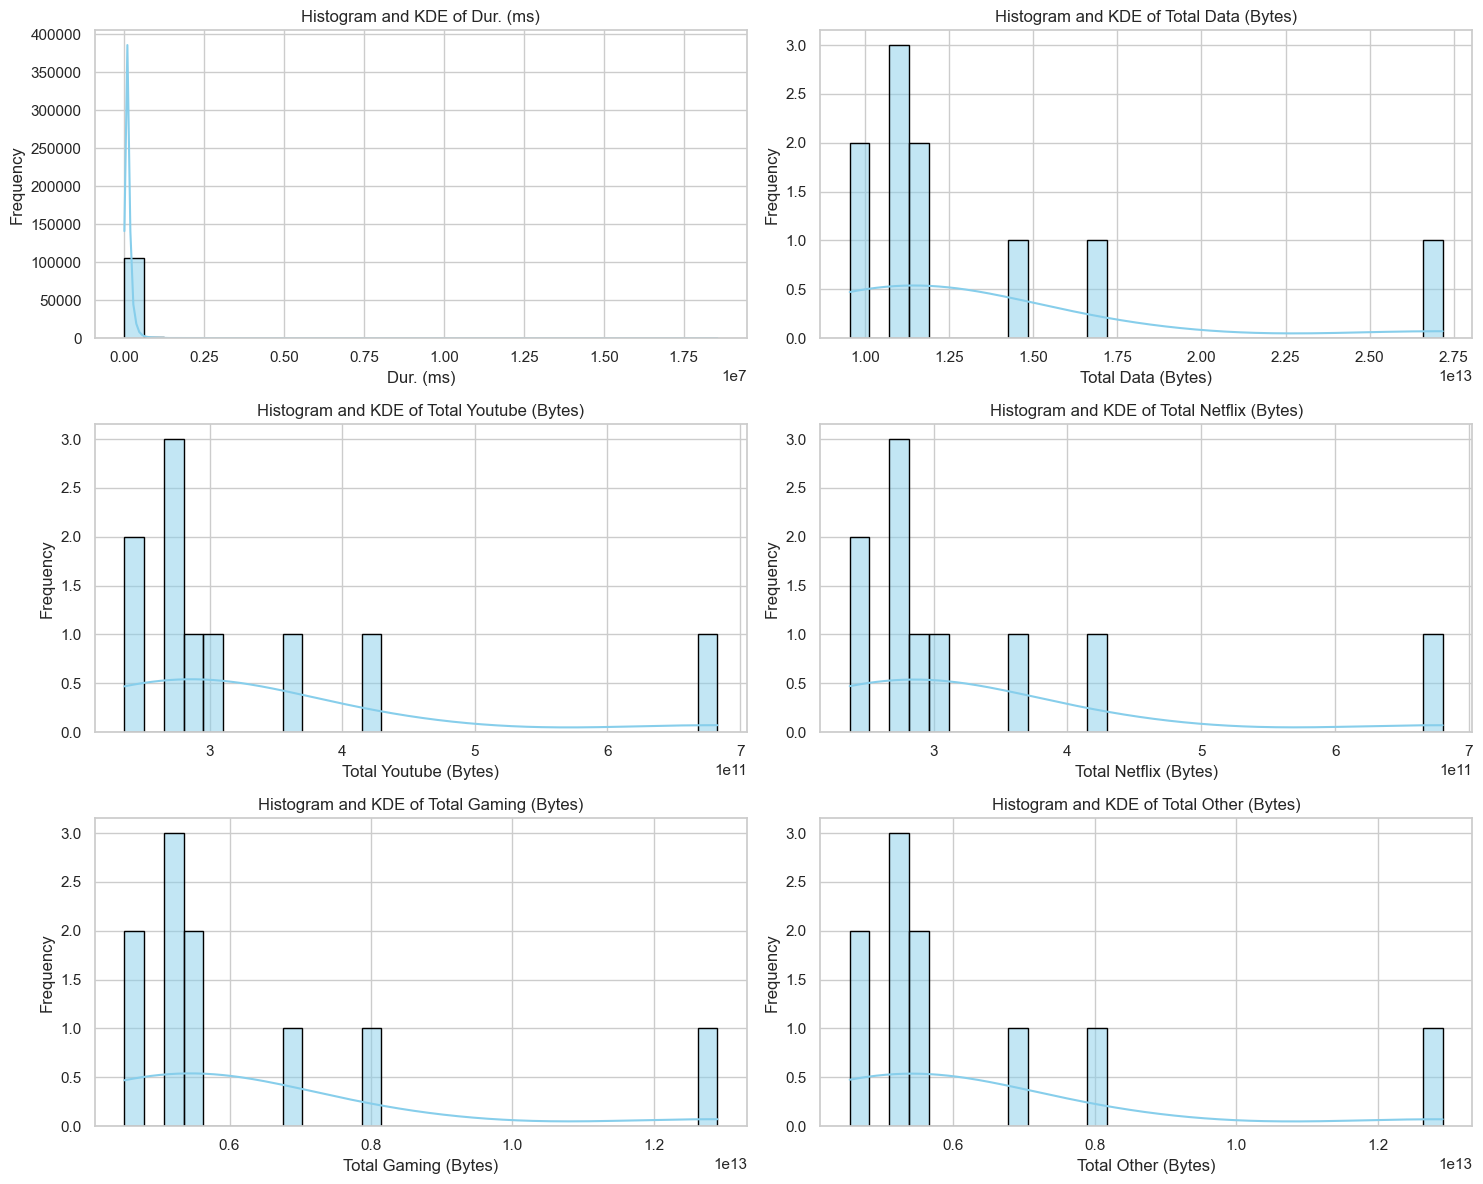

In [31]:
quantitative_vars = ['Dur. (ms)', 'Total Data (Bytes)', 'Total Youtube (Bytes)', 
                     'Total Netflix (Bytes)', 'Total Gaming (Bytes)', 'Total Other (Bytes)']

plotter.plot_quantitative_data(quantitative_vars)

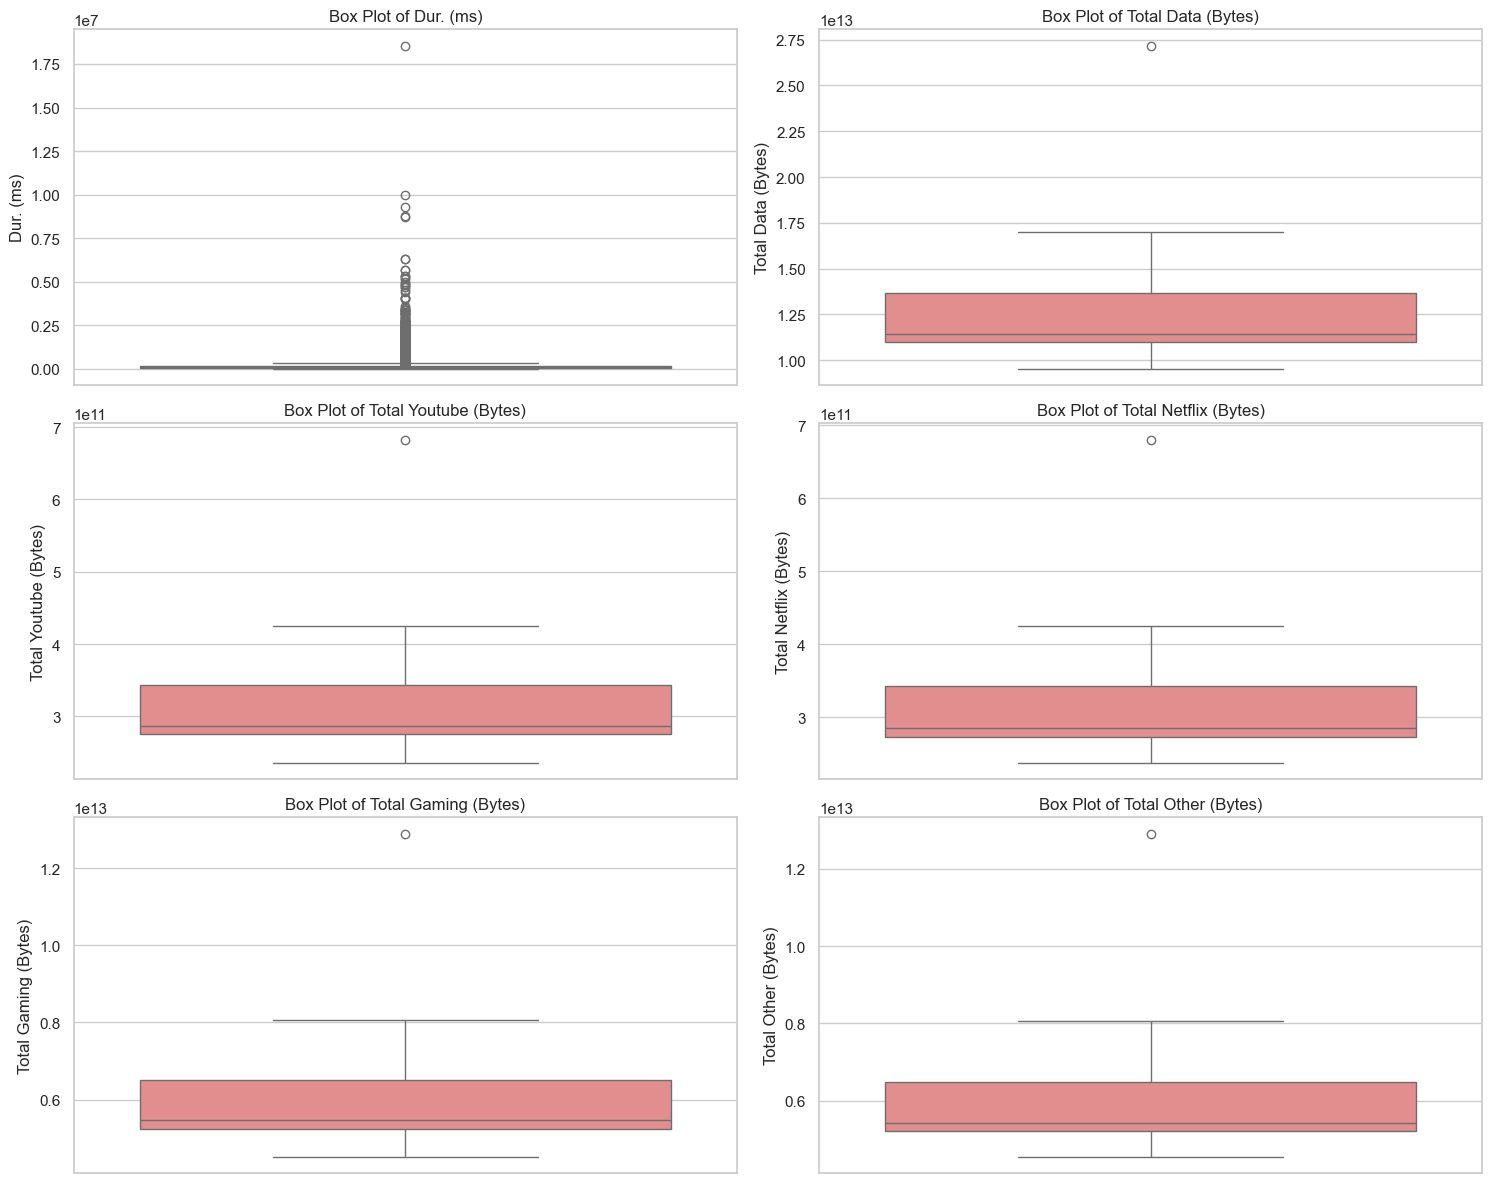

In [32]:
quantitative_vars = ['Dur. (ms)', 'Total Data (Bytes)', 'Total Youtube (Bytes)', 
                     'Total Netflix (Bytes)', 'Total Gaming (Bytes)', 'Total Other (Bytes)']
plotter.plot_boxplots(quantitative_vars)

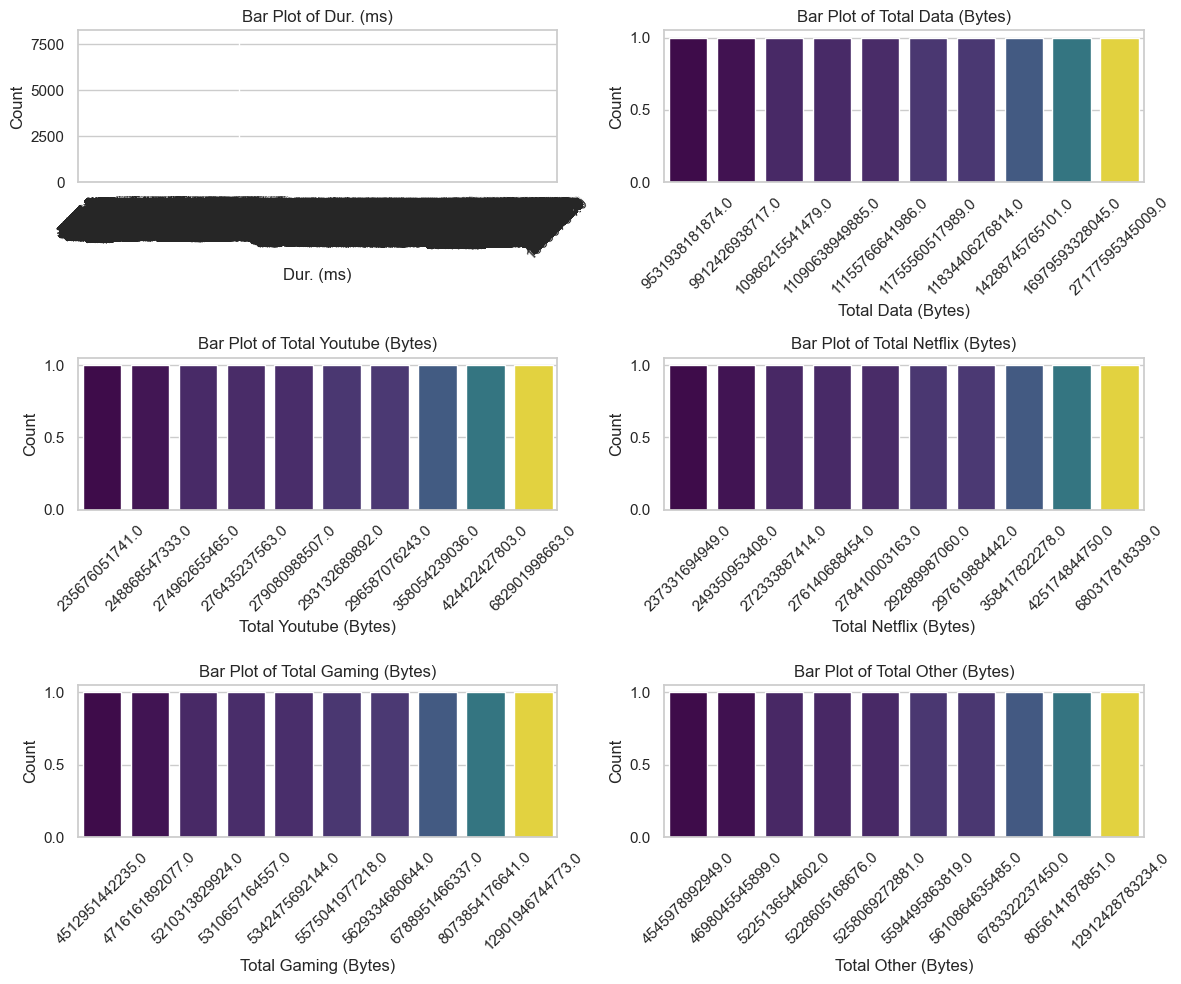

In [33]:
value_counts = {var: aggregated_data[var].value_counts() for var in quantitative_vars}

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, var in enumerate(quantitative_vars):
    ax = axes[i // 2, i % 2] 
    sns.countplot(x=aggregated_data[var], ax=ax, hue=aggregated_data[var], palette='viridis', legend=False)
    ax.set_title(f'Bar Plot of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Bivariate Analysis
#### Relationship Between Applications and Total Data

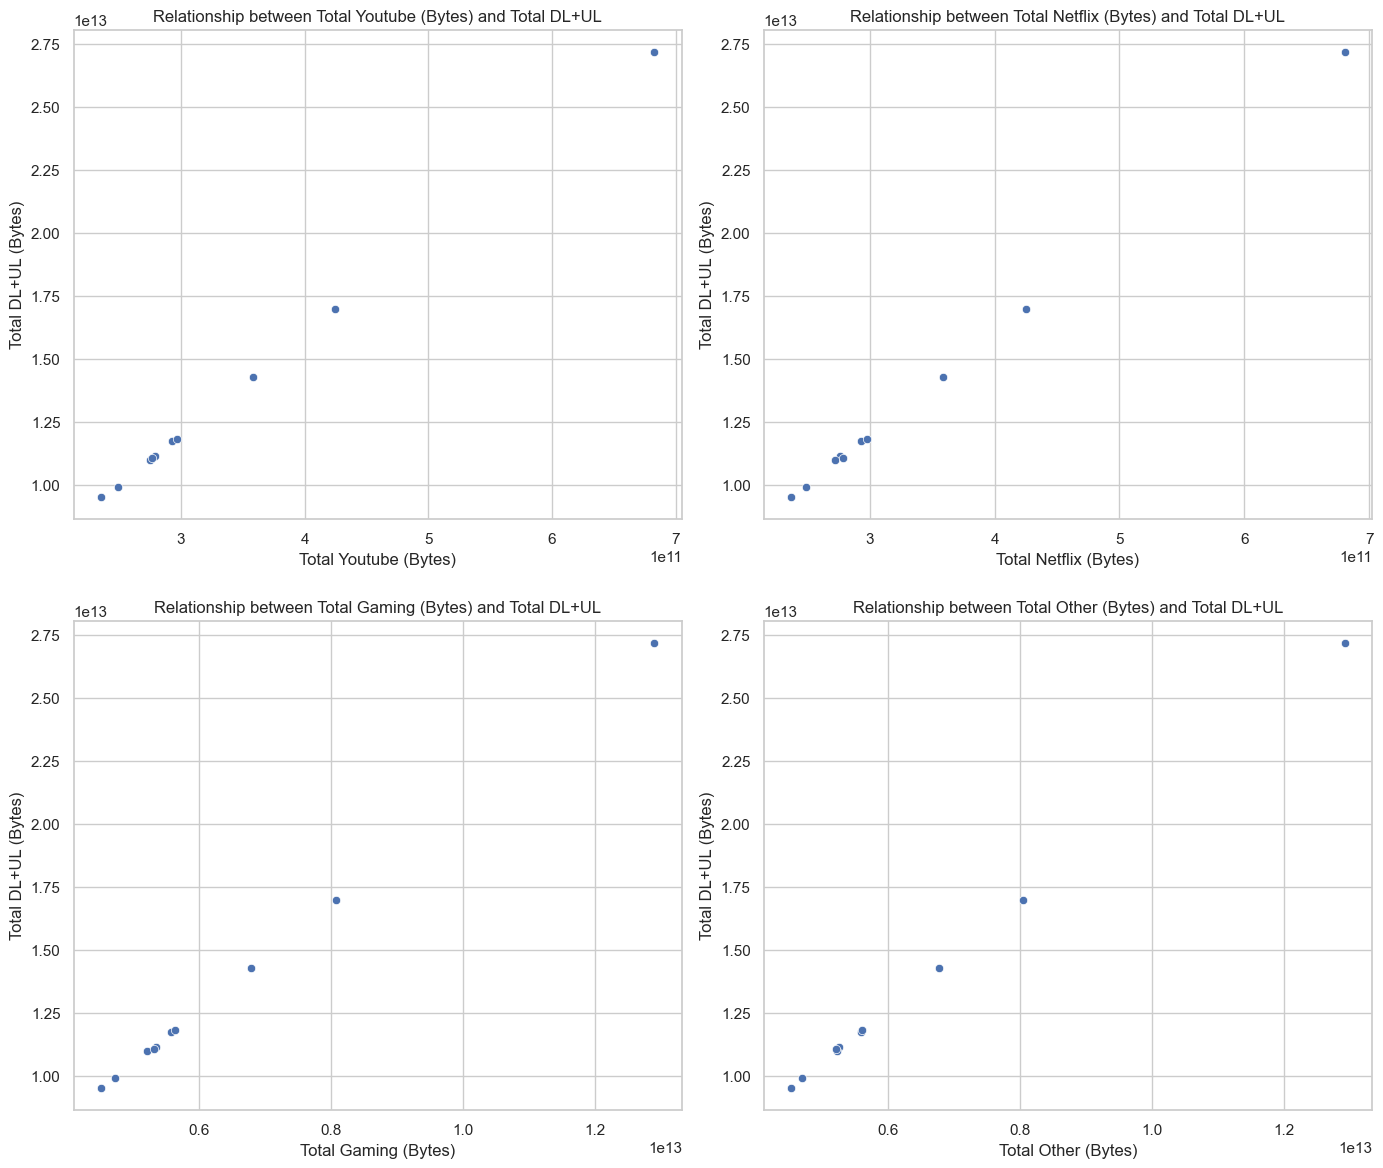

In [34]:
plotter.plot_scatter_with_total_dlul()

In [ ]:
correlation_matrix = aggregated_data[applications + ['Total DL+UL (Bytes)']].corr()

correlation_matrix

In [36]:
columns_to_analyze = [#'Social Media (Bytes)', 'Google (Bytes)', 'Email (Bytes)',
                      'Total Youtube (Bytes)', 'Total Netflix (Bytes)', 'Total Gaming (Bytes)', 'Total Other (Bytes)']
correlation_matrix = aggregated_data[columns_to_analyze].corr()
correlation_matrix

Total Youtube (Bytes)  Total Netflix (Bytes)  \
Total Youtube (Bytes)                      1                      1   
Total Netflix (Bytes)                      1                      1   
Total Gaming (Bytes)                       1                      1   
Total Other (Bytes)                        1                      1   

                       Total Gaming (Bytes)  Total Other (Bytes)  
Total Youtube (Bytes)                     1                    1  
Total Netflix (Bytes)                     1                    1  
Total Gaming (Bytes)                      1                    1  
Total Other (Bytes)                       1                    1

### Correlation Analysis
#### Correlation Matrix

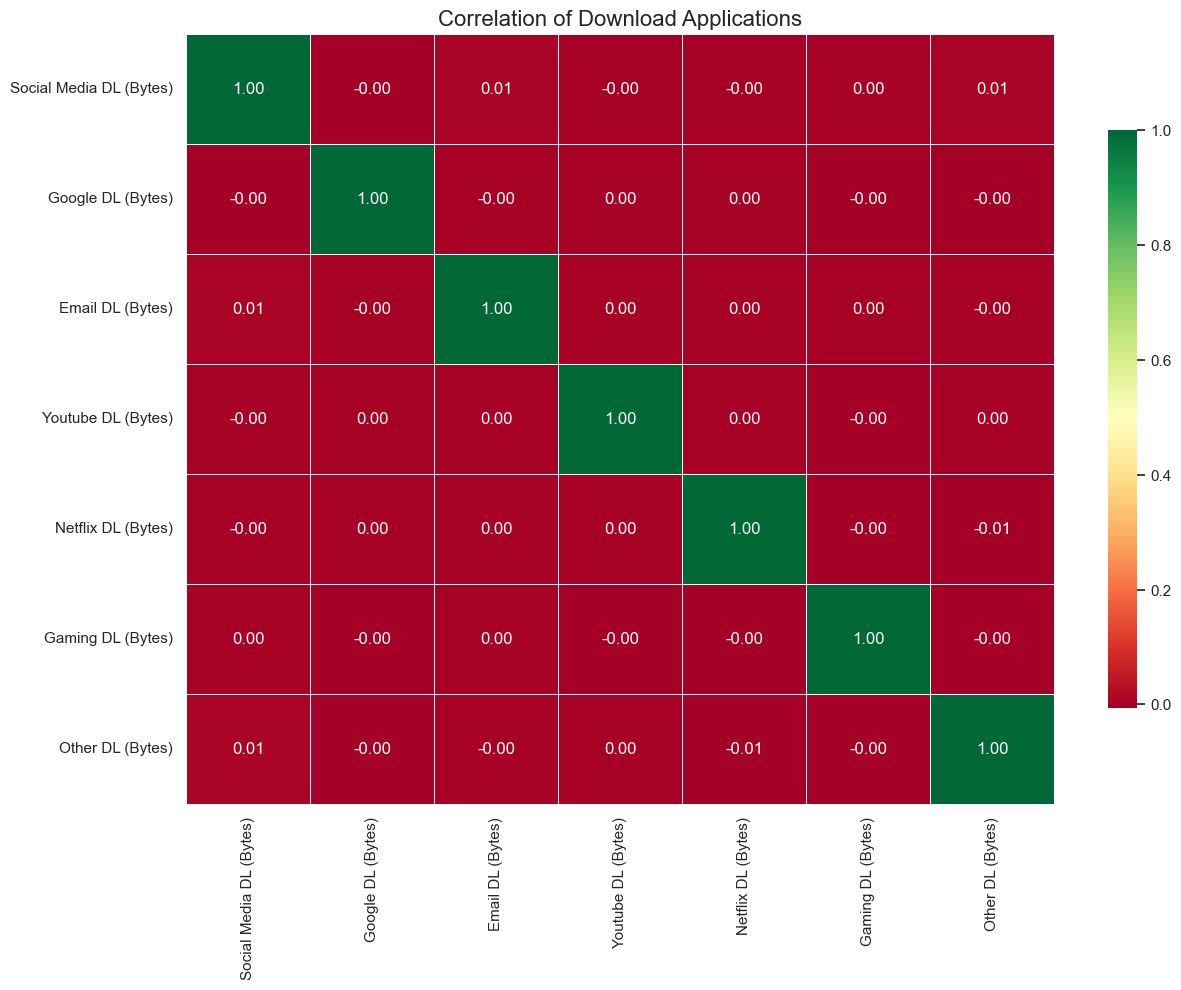

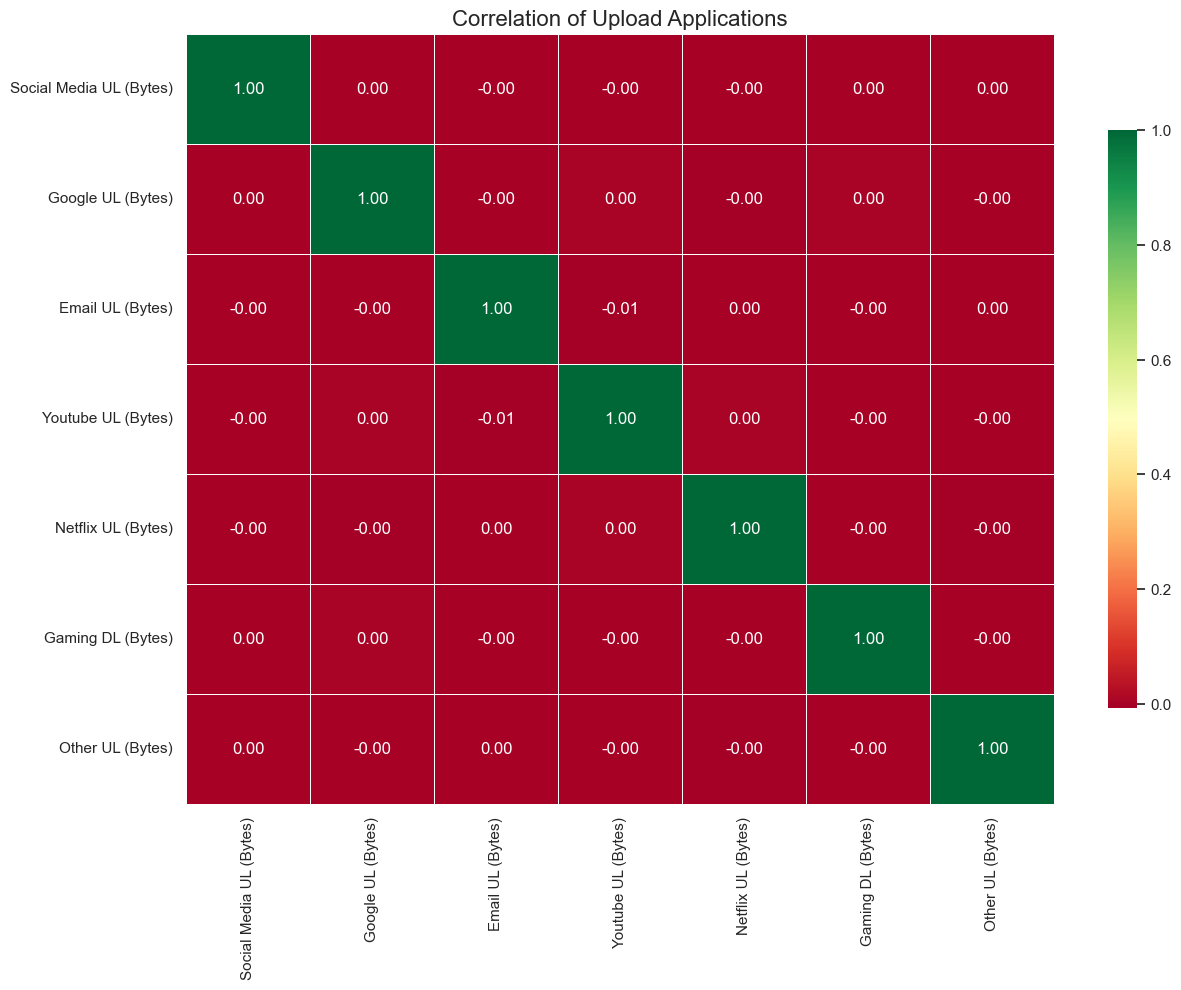

In [37]:
plotter = Plot(df)
# List of variables to analyze
variables = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
             'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
variables1 = ['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 
             'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Other UL (Bytes)']

# Title for the heatmap
title = "Correlation of Download Applications"
title1 = "Correlation of Upload Applications"

# Call the method to plot the correlation heatmap
plotter.plot_correlation_heatmap(variables, title)
# Call the method to plot the correlation heatmap
plotter.plot_correlation_heatmap(variables1, title1)

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\plot.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaled['Total Social Media (Bytes)'] = data_scaled['Social Media DL (Bytes)'] + data_scaled['Social Media UL (Bytes)']
c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\plot.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaled['Total Google (Bytes)'] = data_scaled['Google DL (Bytes)'] + data_scaled['Google UL (Bytes)']
c:\Users\Admin\10_Academy_AI_Mastery_kif

Explained Variance Ratio for each component:
[0.14427978 0.14382279]

Cumulative Explained Variance:
[0.14427978 0.28810256]

First 2 principal components:
[[-0.47562081  1.26060616]
 [-0.30148866 -0.93565119]
 [-0.18756851 -0.83083314]
 [ 1.09179245 -1.32694918]
 [ 0.47644675 -0.99059216]]


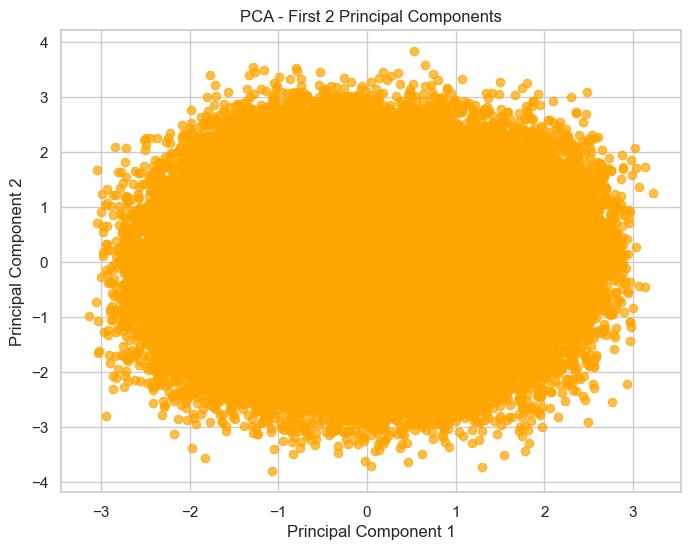

In [38]:
columns_to_pca = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
             'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
             'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 
             'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']
# Gaming UL (Bytes)

# Call the PCA method to perform PCA and display results
plotter.perform_pca(columns_to_pca)

In [39]:
df.head()

Bearer Id            Start  Start ms              End  End ms  \
0 13114483460844900352   4/4/2019 12:01       770  4/25/2019 14:35     662   
1 13114483482878900224   4/9/2019 13:04       235   4/25/2019 8:15     606   
2 13114483484080500736   4/9/2019 17:42         1  4/25/2019 11:58     652   
3 13114483485442799616   4/10/2019 0:31       486   4/25/2019 7:36     171   
4 13114483499480700928  4/12/2019 20:10       565  4/25/2019 10:40     954   

   Dur. (ms)            IMSI  MSISDN/Number           IMEI  \
0    1823652 208201448079117    33664962239 35521209507511   
1    1365104 208201909211140    33681854413 35794009006359   
2    1361762 208200314458056    33760627129 35281510359387   
3    1321509 208201402342131    33750343200 35356610164913   
4    1089009 208201401415120    33699795932 35407009745539   

      Last Location Name  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  9.16456699548519E+015  ...             2501332             8198936   
1                L77566A  ...            19111729            18338413   
2                D42335A  ...            14699576            17587794   
3                T21824A  ...            15146643            13994646   
4                D88865A  ...            18962873            17124581   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0             9656251          278082303           14344150         171744450   
1            17227132          608750074            1170709         526904238   
2             6163408          229584621             395630         410692588   
3             1097942          799538153           10849722         749039933   
4              415218          527707248            3529801         550709500   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  Duration (seconds)  
0           8814393          36749741         308879636                1824  
1          15055145          53800391         653384965                1365  
2           4215763          27883638         279807335                1362  
3          12797283          43324218         846028530                1322  
4          13910322          38542814         569138589                1089  

[5 rows x 56 columns]

## User Analysis

In [57]:
from user_analysis import TelecomUserAnalysis

In [58]:
# Instantiate and run analysis
telecom_analysis = TelecomUserAnalysis(df)

### User Overview Analysis


📊 USER OVERVIEW ANALYSIS

🔹 Basic Statistics:
                 Bearer Id  Start ms  End ms  Dur. (ms)            IMSI  \
count               148837    148837  148837     148837          148837   
mean  10138860120083793920       499     499     105016 208201639639225   
std    2893143515612098048       289     288      81012     21530748358   
min    6917537518543529984         0       0       7142 204047108489451   
25%    7349883247060729856       250     251      58151 208201401263920   
50%    7349883264155990016       499     500      86399 208201546331184   
75%   13042425978962800640       749     750     132848 208201771620051   
max   13186541167134199808       999     999    1859336 214074303349628   

        MSISDN/Number           IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count          148837         148837           148837           148837   
mean      41888078015 48478815590442               99               17   
std     2448248968244 22417133588233              528  

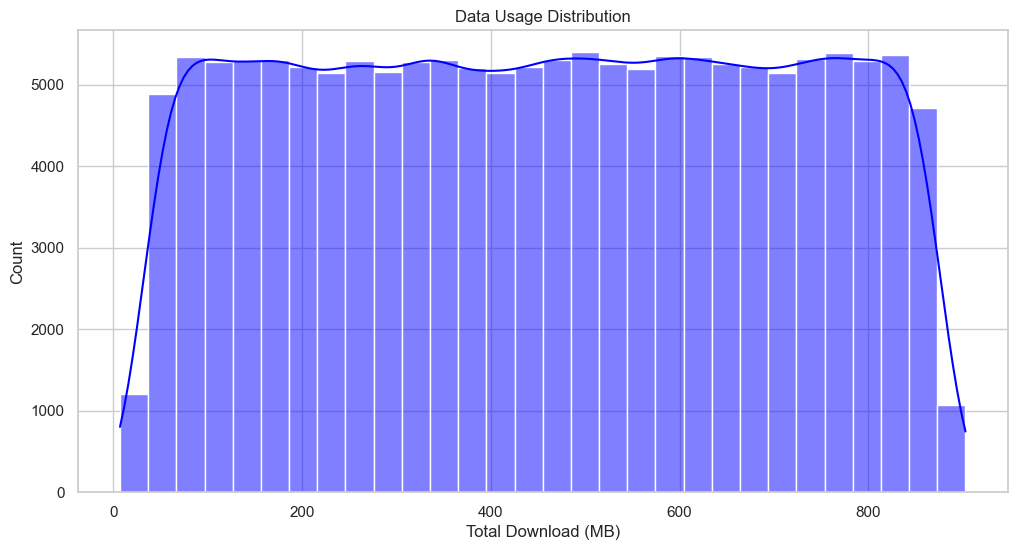


🔹 Customer Segments Assigned (0, 1, 2):
Cluster
0    69455
1    68646
2    10736
Name: count, dtype: int64

🔹 Average Customer Lifetime Value (CLV):
8038695.991281335


In [42]:
telecom_analysis.user_overview()


📊 **Duration-Based Segmentation**
Duration_Segment
Medium duration (1-5 min)    106799
low duration (<1 min)         38480
Long duration (>5 min)         3558
Name: count, dtype: int64


c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\user_analysis.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x="Duration_Segment", palette="coolwarm")


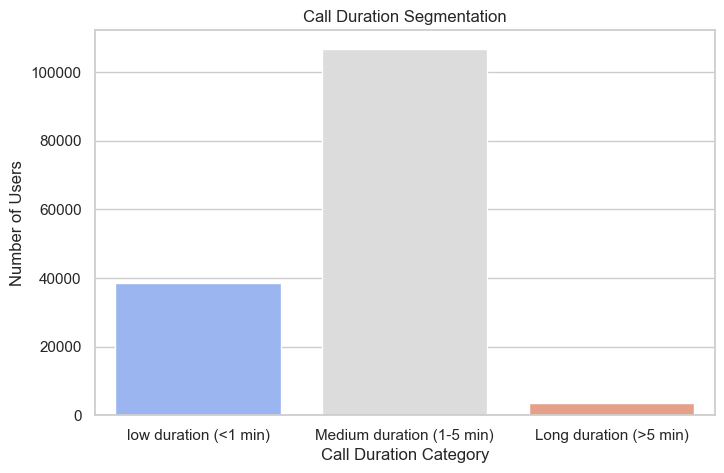

In [54]:
telecom_analysis.segment_by_duration()


📊 **Location-Based Segmentation**

🔹 **Top 10 Locations**:
 Last Location Name
D41377B                  80
D17085A                  59
D72396C                  57
9.16456698599501E+015    55
D73604C                  55
D11119B                  54
9.1645670130491E+015     51
L41377B                  51
D11002B                  50
L70357B                  46
Name: count, dtype: int64


c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\user_analysis.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")


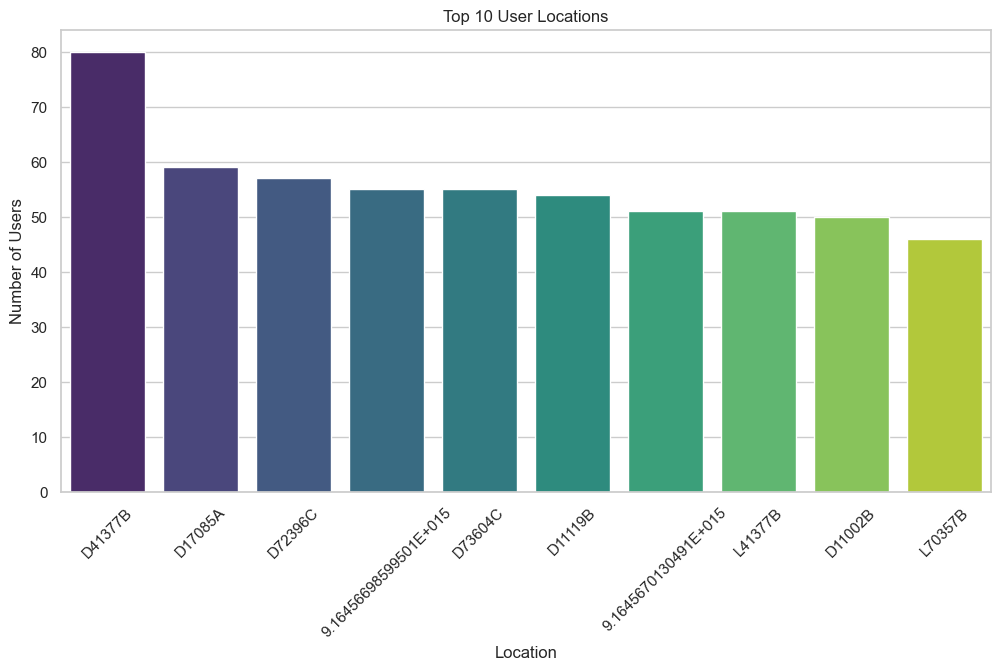

In [55]:
telecom_analysis.segment_by_location('top')


📊 **Location-Based Segmentation**

🔹 **Top 10 Locations**:
 Last Location Name
G85898A    1
T20177B    1
D77574B    1
D83794A    1
D21131B    1
T70602C    1
T79480A    1
T20932C    1
T37799B    1
L88342B    1
Name: count, dtype: int64


c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\user_analysis.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  self.df["Total DL (Bytes)"].max()]


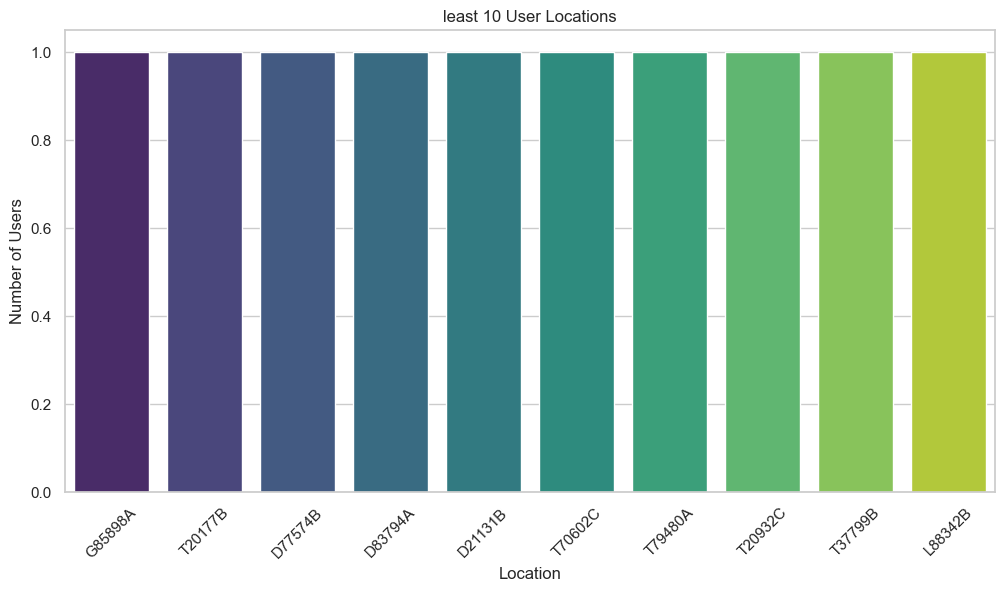

In [56]:
telecom_analysis.segment_by_location('least')


📊 **Usage-Based Segmentation**
Usage_Segment
Medium Data User    50605
Low Data User       49116
High Data User      49116
Name: count, dtype: int64


c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2_v1\scripts\user_analysis.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x="Usage_Segment", palette="muted")


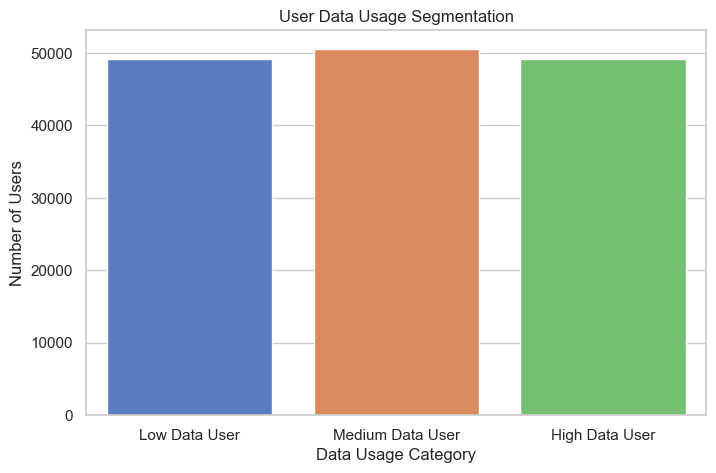

In [50]:
telecom_analysis.segment_by_usage()


📊 **Multi-Metric Segmentation (K-Means Clustering)**

🔹 **K-Means Cluster Distribution**:
 Cluster Label
Light Users       69455
Moderate Users    68646
Heavy Users       10736
Name: count, dtype: int64


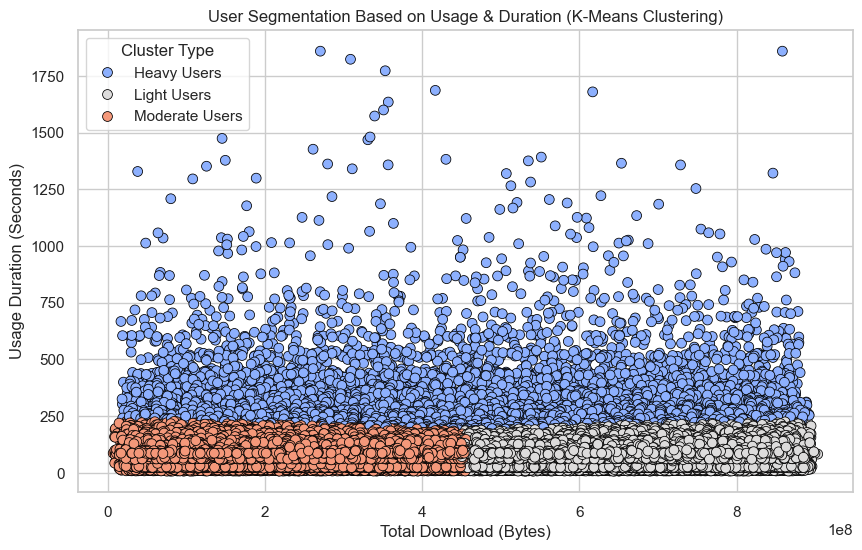

In [59]:
telecom_analysis.multi_metric_segmentation()

✅ Cluster 0 → **"Light Users"** (low data usage, low call duration)

✅ Cluster 1 → **"Data Consumers"** (high data usage, moderate call duration)

✅ Cluster 2 → **"Heavy Callers"** (high call duration, mixed data usage)

1️⃣ Insights from User Segmentation
🔹 Cluster 0: Light Users (Low Data & Short Call Duration)

    These users consume minimal mobile data and have short call durations.
    Likely consists of users who only use basic services, such as calls, SMS, or occasional internet browsing.
    Could include elderly users, low-income customers, or people using secondary SIMs for limited purposes.

📌 Recommendation:
✅ Offer affordable voice & SMS bundles to retain this segment.
✅ Introduce low-data prepaid plans to encourage mobile data adoption.
✅ Educate users about the benefits of mobile data through personalized marketing campaigns.
🔹 Cluster 1: Moderate Users (Balanced Data & Call Usage)

    This segment uses both voice and data services moderately.
    Likely consists of working professionals, students, and casual internet users.
    They prefer balanced plans with reasonable pricing for both calls and data.

📌 Recommendation:
✅ Offer bundled packages with both voice & data incentives (e.g., combo plans with free social media usage).
✅ Promote loyalty rewards (discounts, free weekend calls) to increase retention.
✅ Provide upselling opportunities for users moving towards the Heavy Users category.
🔹 Cluster 2: Heavy Users (High Data & Long Call Duration)

    This group has significant data consumption & long call durations.
    Likely consists of business users, remote workers, gamers, or streaming users.
    These users demand high-speed, uninterrupted connectivity and are willing to pay for premium services.

📌 Recommendation:
✅ Introduce unlimited data plans and 5G premium subscriptions for heavy data users.
✅ Ensure strong network quality & speed to prevent churn from dissatisfied high-value customers.
✅ Offer exclusive perks, such as priority customer support, international call discounts, or VIP loyalty programs.
2️⃣ Strategic Recommendations for Telecom Operators
📈 Monetization & Growth Strategies

✔️ Tiered Pricing Model – Develop personalized plans for each segment to maximize revenue.
✔️ Cross-Selling Opportunities – Encourage light users to upgrade and moderate users to move to premium plans.
✔️ Data-Driven Marketing – Use AI-based recommendations to suggest custom plans based on past behavior.
📡 Network Optimization Strategies

✔️ Invest in network capacity & speed improvements in areas with high heavy-user density.
✔️ Ensure seamless service quality to retain heavy users (who contribute higher ARPU).
✔️ Expand 5G & fiber-optic solutions for data-intensive segments.
🎯 Customer Engagement & Retention

✔️ Offer incentives for referrals to acquire new customers in the Light & Moderate User segments.
✔️ Use push notifications, SMS offers, & email marketing to keep users engaged.
✔️ Improve customer support for Heavy Users, as they are likely more sensitive to service quality.

### User Engagement Analysis


📊 USER ENGAGEMENT ANALYSIS

🔹 Active Users Count:
Active
0    74419
1    74418
Name: count, dtype: int64


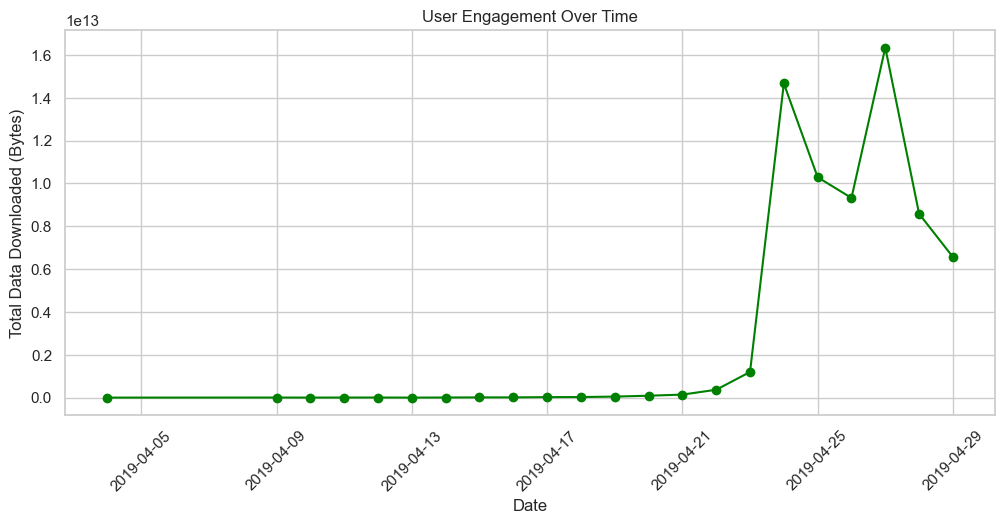


🔹 Churn Prediction Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14926
           1       1.00      1.00      1.00     14842

    accuracy                           1.00     29768
   macro avg       1.00      1.00      1.00     29768
weighted avg       1.00      1.00      1.00     29768



In [43]:
telecom_analysis.user_engagement()

📊 Insights:

1️⃣ Minimal Activity Before April 21st:

    User engagement (measured by total data downloaded) was almost negligible before April 21st.
    This suggests either low user adoption, network restrictions, or lack of promotions during this period.

2️⃣ Sudden Surge in Data Usage (April 21-25):

    There is a huge spike in engagement starting around April 21st.
    Possible reasons:
    ✅ Promotional Offers (e.g., free data, discounted bundles, or unlimited plans)
    ✅ Launch of a New Service (e.g., video streaming, gaming, or social media bundle)
    ✅ Network Expansion (e.g., improved 4G/5G coverage in new areas)

3️⃣ Fluctuating Usage After Peak (April 25-29):

    There is a drop in engagement after reaching its peak around April 25th.
    Possible causes:
    ✅ End of Promotional Period → Users reduced data consumption
    ✅ Network Congestion → Slower speeds discouraged heavy usage
    ✅ Service Issues or Price Increases → Users cut back on usage

📌 Recommendations for Telecom Operators:
🚀 1. Capitalize on High-Engagement Periods

✔️ If the spike was due to a promotion, consider extending or repeating it with slight modifications.
✔️ If it was due to a service launch, focus on marketing & customer education to sustain growth.
📈 2. Convert Temporary Users into Long-Term Subscribers

✔️ Offer loyalty-based rewards for continued engagement beyond the peak period.
✔️ Provide discounted post-promotion plans to retain high-data users.
✔️ Promote data-intensive services like video streaming, cloud storage, or gaming with exclusive partnerships.
📡 3. Improve Network Performance & Scalability

✔️ If network congestion caused the drop, optimize bandwidth allocation & data throttling policies.
✔️ Enhance infrastructure in high-demand areas to maintain consistent speeds.


📊 USER EXPERIENCE ANALYSIS


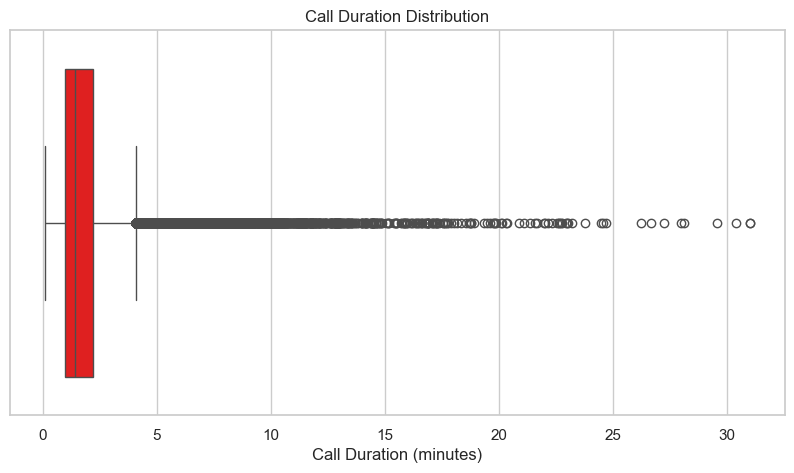


🔹 Users with Short Call Duration (Potential Quality Issues):
                IMSI  MSISDN/Number  Duration (seconds)
8059 208201447686214    33631645708                  30
8063 208200313058037    33608450296                  30
8072 208201715058144    33679922023                  30
8098 208201715847103    33699259325                  30
8100 208201907956005    33667732410                  29


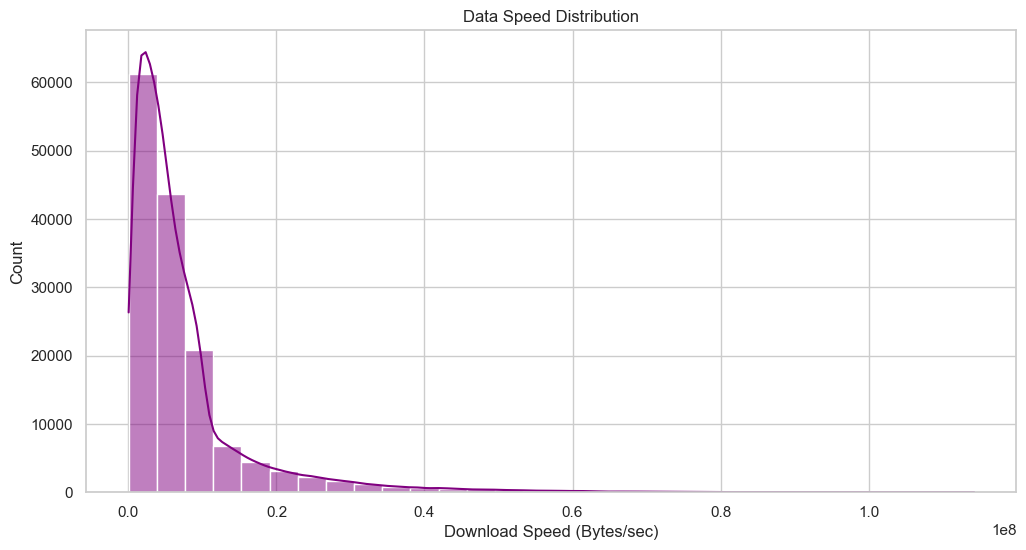

In [44]:
telecom_analysis.user_experience()

1️⃣ Highly Skewed Call Duration

    The majority of calls are very short, concentrated within 0-5 minutes.
    A small percentage of calls extend beyond 10 minutes, with some extreme outliers reaching 30+ minutes.
    This indicates that most users prefer shorter calls, likely due to cost sensitivity or reliance on alternative communication methods (e.g., messaging apps).

2️⃣ Presence of Outliers (Long Calls)

    A few customers make exceptionally long calls, suggesting business use cases, customer support calls, or special events.
    These users might be premium subscribers or high-value customers who require tailored plans.

📌 Recommendations for Telecom Operators:
📢 1. Offer Tiered Voice Plans Based on Usage

✔️ Short-duration users: Introduce per-minute billing or micro-packages for budget-conscious users.
✔️ Long-duration users: Create unlimited or discounted long-call plans to retain them and increase ARPU (Average Revenue Per User).
📞 2. Promote VoLTE & HD Voice Services

✔️ Educate users about VoLTE (Voice over LTE) benefits, including clearer calls and lower data usage for voice.
✔️ Offer free VoLTE trials to encourage adoption among frequent callers.
📈 3. Monetize Long Callers & Business Users

✔️ High-value customers (frequent long callers) could be offered premium customer service or exclusive call discounts.
✔️ Partner with corporate clients to provide business call packages.
📡 4. Investigate Network Performance for Short Calls

✔️ If calls are too short due to dropped connections, it may indicate network reliability issues.
✔️ Analyze call drop rates & invest in improving coverage and voice quality.

    Skewed Distribution:
        The download speed distribution is highly skewed to the right, indicating that most users experience lower speeds, with only a few having high speeds.

    High Concentration of Low Speeds:
        A significant portion of users experience lower download speeds, as seen in the tall bars clustered on the left side of the histogram.
        This suggests possible network congestion, bandwidth limitations, or infrastructure issues.

    Long Tail Effect:
        The long right tail suggests that a small percentage of users have significantly higher speeds.
        These high speeds may be due to premium plans, fiber-optic connections, or proximity to network towers.

    Potential Bottlenecks:
        If the organization has promised higher speeds, the large number of low-speed users may indicate performance issues such as outdated infrastructure, server congestion, or poor network optimization.

Recommendations for the Telecom Organization:

    Network Optimization:
        Identify areas with consistently low speeds and optimize bandwidth allocation.
        Implement better traffic management techniques, such as load balancing and caching.

    Infrastructure Investment:
        Upgrade network towers and fiber-optic infrastructure to improve speed distribution.
        Expand coverage to reduce congestion in high-density areas.

    User Segmentation & Plan Adjustments:
        Consider offering different service tiers based on speed requirements.
        Adjust pricing strategies to balance network usage across different user groups.

    Improve Service Quality:
        Conduct region-based analysis to identify locations with consistently poor speeds.
        Provide targeted support and enhancements (e.g., better routers, signal boosters).

    Customer Communication & Education:
        Inform customers about factors affecting their speeds (e.g., peak hours, device limitations).
        Provide tools for users to test and optimize their speeds.


📊 USER SATISFACTION ANALYSIS

🔹 Average CSAT Score: 3.00 (Scale 1-5)

🔹 Net Promoter Score (NPS): -0.24


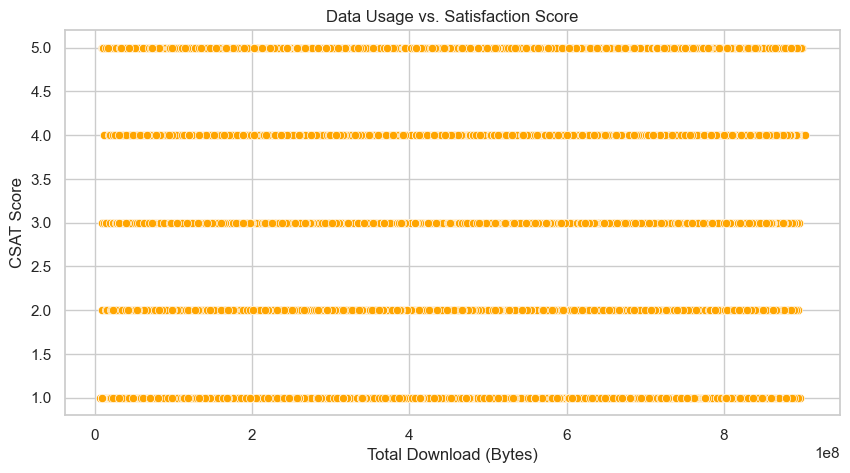

In [45]:
telecom_analysis.user_satisfaction()

🔍 Insights:

1️⃣ No Strong Relationship Between Data Usage & Satisfaction

    The CSAT scores (Customer Satisfaction Scores) are evenly distributed across different data usage levels.
    This suggests that higher data usage does not necessarily correlate with higher satisfaction.

2️⃣ Presence of Low Satisfaction Scores Across All Usage Levels

    Even high data consumers report dissatisfaction (CSAT = 1 or 2).
    This indicates that issues beyond data volume affect customer experience, such as network speed, reliability, pricing, or customer support.

3️⃣ High Satisfaction at All Usage Levels

    Some low and high data users report CSAT = 5, meaning some users are satisfied regardless of their data consumption.
    This suggests that customer expectations, network quality, or personalized plans might influence satisfaction more than usage itself.

📌 Recommendations for Telecom Operators:
📶 1. Investigate Reasons for Low Satisfaction Among High Users

✔️ Conduct customer feedback analysis to determine whether issues stem from network congestion, speed limitations, pricing, or customer service.
✔️ Implement loyalty programs or exclusive data add-ons for high-consumption users to boost satisfaction.
💰 2. Offer Personalized Plans Based on Usage Patterns

✔️ Users with low data but low satisfaction may need better value packs or improved network access.
✔️ Users with high data and low satisfaction may require higher-speed plans or premium support.
⚡ 3. Improve Network Performance & Fair Usage Policy

✔️ Ensure sufficient bandwidth for heavy users to avoid network congestion.
✔️ Optimize Fair Usage Policies (FUP) so that high users don’t experience speed throttling too soon, which can lead to dissatisfaction.
📢 4. Improve Customer Engagement & Support

✔️ Low CSAT scores may be service-related (e.g., billing, customer support, or complaints) rather than data-related.
✔️ Improve customer communication channels, proactive issue resolution, and AI-driven support systems.

## 2. Task 2 - User Engagement Analysis